## Installs and imports

In [ ]:
pip install tweepy

In [ ]:
pip install wordcloud

In [ ]:
!pip install python-igraph
!pip install cairocffi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 1.9 MB/s eta 0:00:00


In [ ]:
from textblob import TextBlob
import tweepy

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import scale as mscale
import seaborn as sns

from wordcloud import WordCloud
import ast
import itertools
import networkx as nx

import cairocffi as cairo
import igraph as ig
from igraph import *

import nltk
import random

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from collections import Counter

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Prepare tweepy for collecting data

In [ ]:

#Fill with your credentials
consumer_key = ""
consumer_secret = ""

access_token = ""
access_token_secret = ""
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

Forbidden: ignored

## Get statuses from datasets by id

In [ ]:
def getStatuses(data):
    ids_tw = data['id']
    ids_tw = list(ids_tw)

    statuses = []

    iter = int((len(ids_tw)-1)/50)

    for i in range(iter):

        ids_twi = ids_tw[(i*50):((i+1)*50)]
        statusesi = api.statuses_lookup(ids_twi, tweet_mode='extended')
        for j in (range(len(statusesi))):
            statuses.append(statusesi[j])
    return statuses

In [ ]:
#Extracting data of csv with tweets id

data_real=pd.read_csv('genuine.csv')
data_fake = pd.read_csv('Fake2.csv')

statuses_real = getStatuses(data_real)
statuses_fake = getStatuses(data_fake)

#id = 1483427718448488450
#list_id = [1483427718448488450,1483751013261754368,1483521480323473416,1483732635499188224]
#status = api.get_status(id, tweet_mode ='extended')
#statuses = api.lookup_statuses(ids, tweet_mode='extended')



## Convert the statuses into dataframes

In [ ]:
def getDataFrame(statuses):
    id_tw = []
    user_ids = []
    screen_name = []
    user = []
    tweet = []
    hashtags = []
    hashtags_text = []
    mentions = []
    mentions_name = []
    hashtags_text = []
    retweets = []
    favorites = []
    date = []
    location = []
    followers = []

    column_names = ['id','user_id','screen_name','user','followers','tweet','hashtags','mentions','retweets','favorites','location','date']


    # We extract user, text, retweets, favorites of a tweet

    for i in range(len(statuses)):
        id_tw.append(statuses[i].id)
        tweet.append(statuses[i].full_text)
        hashtags.append(statuses[i].entities['hashtags'])
        mentions.append(statuses[i].entities['user_mentions'])
        user.append(statuses[i].user.name)
        retweets.append(statuses[i].retweet_count)
        favorites.append(statuses[i].favorite_count)
        date.append(statuses[i].created_at)
        location.append(statuses[i].user.location)
        followers.append(statuses[i].user.followers_count)
        user_ids.append(statuses[i].user.id)
        screen_name.append(statuses[i].user.screen_name)
        #print(tweet)
        #print(hashtags)
        #print(user)
        #print(retweets)
        #print(favorites)

    # We extract a list with the hashtags used in a tweet
    for k in range(len(hashtags)):
        text = hashtags[k]

        if (len(text)>0):
            text_list = []
            for j in range(len(text)):

                textj =text[j]
                textj = textj['text']

                text_list.append(textj)

            hashtags_text.append(text_list)

        else:

            hashtags_text.append(text)

    for k in range(len(mentions)):
      name = mentions[k]

      if (len(name)>0):
        name_list = []
        for j in range(len(name)):

          namej =name[j]
          namej = namej['name']

          name_list.append(namej)

        mentions_name.append(name_list)

      else:

        mentions_name.append(name)


    #print(hashtags[0:10])
    dataframe = pd.DataFrame(list(zip(id_tw,user_ids,screen_name,user,followers,tweet,hashtags_text,mentions_name,retweets,favorites,location,date)), columns=column_names)


    return dataframe


In [ ]:
statuses_real[0]

### Add labels to the tweets

In [ ]:
df_real= getDataFrame(statuses_real)
df_real["label"] = "real"
df_real.head(10)

id             user_id  ...                date label
0  1255539980610555906  949491464651776001  ... 2020-04-29 16:50:32  real
1  1259871554822955008            14499829  ... 2020-05-11 15:42:40  real
2  1264183579652825088            16012783  ... 2020-05-23 13:17:07  real
3  1264141525815930880          2392031700  ... 2020-05-23 10:30:01  real
4  1262095542110339073            23711785  ... 2020-05-17 19:00:00  real
5  1239909939210063874            36375825  ... 2020-03-17 13:42:20  real
6  1247188892714807296            14499829  ... 2020-04-06 15:46:18  real
7  1252318623273824256            25928253  ... 2020-04-20 19:30:01  real
8  1251618976913936387          2841830411  ... 2020-04-18 21:09:52  real
9  1247785695977955330          2596143056  ... 2020-04-08 07:17:47  real

[10 rows x 13 columns]

In [ ]:
df_fake = getDataFrame(statuses_fake)
df_fake["label"] = "fake"
df_real

id             user_id  ...                date label
0     1255539980610555906  949491464651776001  ... 2020-04-29 16:50:32  real
1     1259871554822955008            14499829  ... 2020-05-11 15:42:40  real
2     1264183579652825088            16012783  ... 2020-05-23 13:17:07  real
3     1264141525815930880          2392031700  ... 2020-05-23 10:30:01  real
4     1262095542110339073            23711785  ... 2020-05-17 19:00:00  real
...                   ...                 ...  ...                 ...   ...
1913  1242528741441425408            59545968  ... 2020-03-24 19:08:31  real
1914  1250310385888002048            37963496  ... 2020-04-15 06:30:00  real
1915  1242471734873174023             8719302  ... 2020-03-24 15:22:00  real
1916  1240598648620224512            41822696  ... 2020-03-19 11:19:01  real
1917  1257105163891990535            25928253  ... 2020-05-04 00:30:01  real

[1918 rows x 13 columns]

## Cleaning Data
### Check if the tweet is original or a retweet of other tweet

In [ ]:
df_real_clean = df_real.copy()
df_fake_clean = df_fake.copy()

df_real_clean["is_retweet"] = df_real_clean["tweet"].str.startswith(("RT @", "rt @"))
df_fake_clean["is_retweet"] = df_fake_clean["tweet"].str.startswith(("RT @", "rt @"))


### Update values of favorites and replace tweet for the text of the tweet that is being retweeted

In [ ]:
statuses_real[0]

Status(_api=<tweepy.api.API object at 0x7fc9610dd110>, _json={'created_at': 'Wed Apr 29 16:50:32 +0000 2020', 'id': 1255539980610555906, 'id_str': '1255539980610555906', 'full_text': 'RT @WHO: Media briefing on #COVID19 with @DrTedros. https://t.co/WC2ljICW8i', 'truncated': False, 'display_text_range': [0, 75], 'entities': {'hashtags': [{'text': 'COVID19', 'indices': [27, 35]}], 'symbols': [], 'user_mentions': [{'screen_name': 'WHO', 'name': 'World Health Organization (WHO)', 'id': 14499829, 'id_str': '14499829', 'indices': [3, 7]}, {'screen_name': 'DrTedros', 'name': 'Tedros Adhanom Ghebreyesus', 'id': 189868631, 'id_str': '189868631', 'indices': [41, 50]}], 'urls': [{'url': 'https://t.co/WC2ljICW8i', 'expanded_url': 'https://www.pscp.tv/w/cXhFnjI2MTAyMHwxZFJLWlFRQkRvZHhCXCU8jHubN6_2i-CRNz4-IiJwD3rf6rf7c4V_qrn5E7M=', 'display_url': 'pscp.tv/w/cXhFnjI2MTAy…', 'indices': [52, 75]}]}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_re

In [ ]:

for i in range(len(df_real_clean)):

    real = []
    real = df_real_clean.iloc[i]
    #mentions = []
    name_list = []

    if real["is_retweet"] == True:
        #print(real["id"])
        #print(statuses_real[i].retweeted_status.favorite_count)
        fav = statuses_real[i].retweeted_status.favorite_count
        original_tweet = statuses_real[i].retweeted_status.full_text
        original_id = statuses_real[i].retweeted_status.id
        original_screen_name = statuses_real[i].retweeted_status.user.screen_name
        original_user = statuses_real[i].retweeted_status.user.name
        original_user_id = statuses_real[i].retweeted_status.user.id
        original_followers = statuses_real[i].retweeted_status.user.followers_count
        original_location = statuses_real[i].retweeted_status.user.location

        df_real_clean.loc[i, "favorites"] = fav
        df_real_clean.loc[i, "tweet"] = original_tweet
        df_real_clean.loc[i, "id"] = original_id
        df_real_clean.loc[i, "user_id"] = original_user_id
        df_real_clean.loc[i, "screen_name"] = original_screen_name
        df_real_clean.loc[i, "user"] = original_user
        df_real_clean.loc[i, "followers"] = original_followers
        df_real_clean.loc[i, "location"] = original_location

print("---------------------------------------------")

for j in range(len(df_fake_clean)):
    fake = []
    fake = df_fake_clean.iloc[j]

    if fake["is_retweet"] == True:
        #print(real["id"])
        #print(statuses_fake[j].retweeted_status.favorite_count)
        fav = statuses_fake[j].retweeted_status.favorite_count
        original_tweet = statuses_fake[j].retweeted_status.full_text
        original_id = statuses_fake[j].retweeted_status.id
        original_user_id = statuses_fake[j].retweeted_status.user.id
        original_screen_name = statuses_fake[j].retweeted_status.user.screen_name
        original_user = statuses_fake[j].retweeted_status.user.name
        original_followers = statuses_fake[j].retweeted_status.user.followers_count
        original_location = statuses_fake[j].retweeted_status.user.location

        df_fake_clean.loc[j, "favorites"] = fav
        df_fake_clean.loc[j, "tweet"] = original_tweet
        df_fake_clean.loc[j, "id"] = original_id
        df_fake_clean.loc[j, "user_id"] = original_user_id
        df_fake_clean.loc[j, "screen_name"] = original_screen_name
        df_fake_clean.loc[j, "user"] = original_user
        df_fake_clean.loc[j, "followers"] = original_followers
        df_fake_clean.loc[j, "location"] = original_location




---------------------------------------------


In [ ]:
df_real_clean.head(1)


id   user_id  ... label is_retweet
0  1255522020235841538  14499829  ...  real       True

[1 rows x 14 columns]

 ### Remove links from tweet

In [ ]:
#Remove links from text

df_real_clean["tweet"] = df_real_clean['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df_real_clean["tweet"]

df_fake_clean["tweet"] = df_fake_clean['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df_fake_clean["tweet"]


0       Killer coronavirus could be spread through the...
1       Bill Gates, Coronavirus, and the Mark of the B...
2       Streets saying we immune because we are the or...
3       What if I was to tell you that a drug to preve...
4       Cocaine cures corona virus!! 😱.  \nThis just g...
                              ...                        
1346    If you ever ate a spicy chicken sandwich from ...
1347    Has the Institute of Military Medicine of the ...
1348    If you played in one of these as a kid, you’re...
1349    Untill now best vaccine against covid 19 is ma...
1350    Today (4-23-20) she totally disappointed by no...
Name: tweet, Length: 1351, dtype: object

### Replace white spaces in locations into 'None'

In [ ]:
for i in range(len(df_real_clean)):
    row = df_real_clean.iloc[i]

    if row["location"] == '':
        df_real_clean.loc[i, "location"] = 'None'

print('-----------------------------------------------------------------------------------------------------')

for j in range(len(df_fake_clean)):
    row = df_fake_clean.iloc[j]

    if row["location"] == '':
        df_fake_clean.loc[j, "location"] = 'None'



-----------------------------------------------------------------------------------------------------


In [ ]:
df_fake_clean

id             user_id  ... label is_retweet
0     1221051871420239874            55135061  ...  fake       True
1     1247787463461883905          2603926808  ...  fake      False
2     1236102818378981377           336649613  ...  fake       True
3     1275905360893751308          4086538637  ...  fake       True
4     1224361515375087620          1625926550  ...  fake       True
...                   ...                 ...  ...   ...        ...
1346  1238012323551268866          2381590040  ...  fake      False
1347  1235237368694743049  867110392866238470  ...  fake       True
1348  1237015701648551945          2800621121  ...  fake       True
1349  1250401664734875648           399551869  ...  fake      False
1350  1253472122204192768          2842485262  ...  fake      False

[1351 rows x 14 columns]

## Saving dataframe in  .csv

In [ ]:
#To avoid connecting to Twitter API everytime we save both dataframes in .csv

df_real_clean.to_csv('complete_genuine.csv')
df_fake_clean.to_csv('complete_fake.csv')

## Create complete dataframe from .csv

In [ ]:
#Extracting data of  complete csv

data_real_clean = pd.read_csv('complete_genuine.csv')
data_fake_clean = pd.read_csv('complete_fake.csv')


In [ ]:
data_fake_clean
#len(data_real_clean)

Unnamed: 0                   id  ...  label is_retweet
0              0  1221051871420239874  ...   fake       True
1              1  1247787463461883905  ...   fake      False
2              2  1236102818378981377  ...   fake       True
3              3  1275905360893751308  ...   fake       True
4              4  1224361515375087620  ...   fake       True
...          ...                  ...  ...    ...        ...
1346        1346  1238012323551268866  ...   fake      False
1347        1347  1235237368694743049  ...   fake       True
1348        1348  1237015701648551945  ...   fake       True
1349        1349  1250401664734875648  ...   fake      False
1350        1350  1253472122204192768  ...   fake      False

[1351 rows x 15 columns]

In [ ]:
data_fake_clean.head(10)
#len(data_fake_clean)

Unnamed: 0                   id  ...  label is_retweet
0           0  1221051871420239874  ...   fake       True
1           1  1247787463461883905  ...   fake      False
2           2  1236102818378981377  ...   fake       True
3           3  1275905360893751308  ...   fake       True
4           4  1224361515375087620  ...   fake       True
5           5  1223542505800716290  ...   fake       True
6           6  1223656003129892864  ...   fake       True
7           7  1271874191722254339  ...   fake       True
8           8  1220436107088859136  ...   fake       True
9           9  1221783626678861824  ...   fake       True

[10 rows x 15 columns]

## Polarity and subjectivity analysis

In [ ]:
# a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

In [ ]:
# -1 defines a negative sentiment and 1 defines a positive sentiment
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
real_subjectivities = [getSubjectivity(content["tweet"]) for index, content in data_real_clean.iterrows()]
real_polarities = [getPolarity(content["tweet"]) for index, content in data_real_clean.iterrows()]

In [ ]:
fake_subjectivities = [getSubjectivity(content["tweet"]) for index, content in data_fake_clean.iterrows()]
fake_polarities = [getPolarity(content["tweet"]) for index, content in data_fake_clean.iterrows()]

In [ ]:
df_real_clean["polarity"] = real_polarities
df_real_clean["subjectivity"] = real_subjectivities

df_fake_clean["polarity"] = fake_polarities
df_fake_clean["subjectivity"] = fake_subjectivities

In [ ]:
df_real_clean.head(5)[['id','tweet','polarity','subjectivity']]


id  ... subjectivity
0  1255522020235841538  ...     0.000000
1  1259871554822955008  ...     0.700000
2  1264183579652825088  ...     0.484848
3  1264141525815930880  ...     0.555758
4  1262095542110339073  ...     0.900000

[5 rows x 4 columns]

In [ ]:
df_fake_clean.head(5)[['id','tweet','polarity','subjectivity']]

id  ... subjectivity
0  1221051871420239874  ...     0.000000
1  1247787463461883905  ...     0.000000
2  1236102818378981377  ...     0.750000
3  1275905360893751308  ...     0.733333
4  1224361515375087620  ...     0.500000

[5 rows x 4 columns]

### Polarity for both real and fake news

In [ ]:
polarity_labels = ["Positive", "Negative", "Neutral"]
polarity_labels2 = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]
subjectivity_labels = ["Subjective", "Objective", "Neutral"]
subjectivity_labels2 = ["Very objective", "Objective", "Neutral", "Subjective", "Very subjective"]

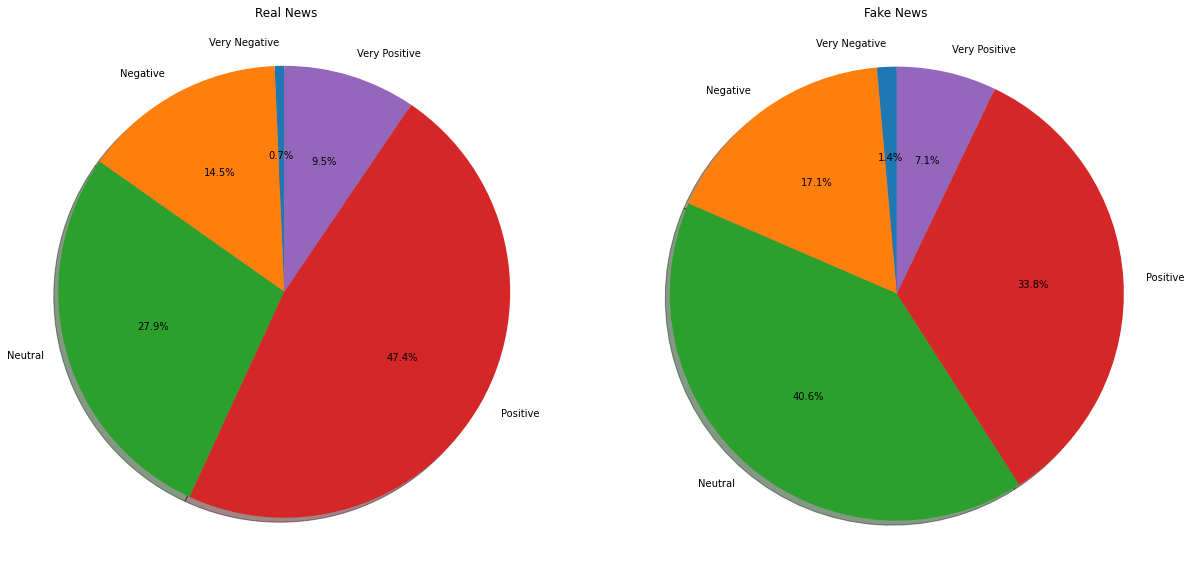

In [ ]:
#subj_size_real = df_real_clean.loc[df_real_clean['subjectivity']>0.5].shape[0]
#obj_size_real = df_real_clean.loc[df_real_clean['subjectivity']<0.5].shape[0]
#neu_size_real = df_real_clean.loc[df_real_clean['subjectivity']==0.5].shape[0]
very_neg_real = 0
neg_real = 0
neu_real = 0
pos_real = 0
very_pos_real = 0

for i in range(len(df_real_clean)):
    pol = df_real_clean.loc[i]["polarity"]
    if (pol<(-0.5)):
        very_neg_real += 1
    elif (pol>=(-0.5) and pol<0):
        neg_real += 1
    elif (pol==0):
        neu_real += 1
    elif (pol>0 and pol<0.5):
        pos_real += 1
    elif (pol>=0.5):
        very_pos_real += 1


#sizes_real = [subj_size_real, obj_size_real, neu_size_real]
sizes_real = [very_neg_real, neg_real, neu_real, pos_real, very_pos_real]

#subj_size_fake = df_fake_clean.loc[df_fake_clean['subjectivity']>0.5].shape[0]
#obj_size_fake = df_fake_clean.loc[df_fake_clean['subjectivity']<0.5].shape[0]
#neu_size_fake = df_fake_clean.loc[df_fake_clean['subjectivity']==0.5].shape[0]

very_neg_fake = 0
neg_fake = 0
neu_fake = 0
pos_fake = 0
very_pos_fake = 0

for i in range(len(df_fake_clean)):
    pol = df_fake_clean.loc[i]["polarity"]
    if (pol<(-0.5)):
        very_neg_fake += 1
    elif (pol>=(-0.5) and pol<0):
        neg_fake += 1
    elif (pol==0):
        neu_fake += 1
    elif (pol>0 and pol<0.5):
        pos_fake += 1
    elif (pol>=0.5):
        very_pos_fake += 1

#sizes_fake = [subj_size_fake, obj_size_fake, neu_size_fake]
sizes_fake = [very_neg_fake, neg_fake, neu_fake, pos_fake, very_pos_fake]

fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

ax2[0].pie(sizes_real,  labels=polarity_labels2, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax2[0].axis('equal')
ax2[0].title.set_text("Real News")

ax2[1].pie(sizes_fake,  labels=polarity_labels2, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2[1].axis('equal')
ax2[1].title.set_text("Fake News")
plt.show()

### Subjectivity for both real and fake news

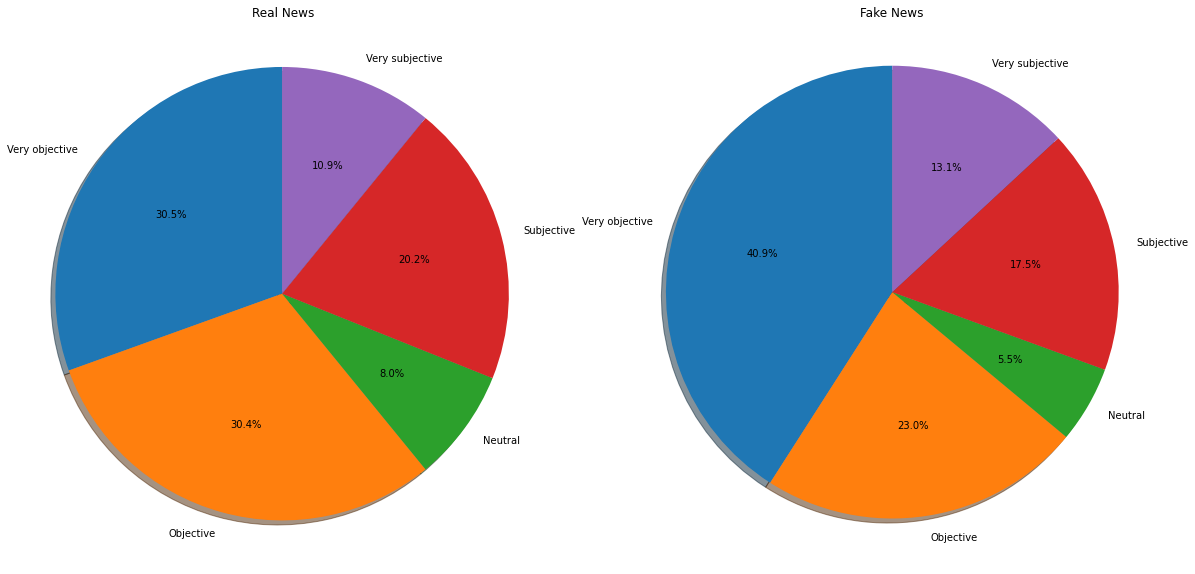

In [ ]:
#subj_size_real = df_real_clean.loc[df_real_clean['subjectivity']>0.5].shape[0]
#obj_size_real = df_real_clean.loc[df_real_clean['subjectivity']<0.5].shape[0]
#neu_size_real = df_real_clean.loc[df_real_clean['subjectivity']==0.5].shape[0]
very_obj_real = 0
obj_real = 0
neu_real = 0
subj_real = 0
very_subj_real = 0

for i in range(len(df_real_clean)):
    subj = df_real_clean.loc[i]["subjectivity"]
    if (subj<0.25):
        very_obj_real += 1
    elif (subj>=0.25 and subj<0.5):
        obj_real += 1
    elif (subj==0.5):
        neu_real += 1
    elif (subj>0.5 and subj<0.75):
        subj_real += 1
    elif (subj>=0.75):
        very_subj_real += 1


#sizes_real = [subj_size_real, obj_size_real, neu_size_real]
sizes_real = [very_obj_real, obj_real, neu_real, subj_real, very_subj_real]

#subj_size_fake = df_fake_clean.loc[df_fake_clean['subjectivity']>0.5].shape[0]
#obj_size_fake = df_fake_clean.loc[df_fake_clean['subjectivity']<0.5].shape[0]
#neu_size_fake = df_fake_clean.loc[df_fake_clean['subjectivity']==0.5].shape[0]

very_obj_fake = 0
obj_fake = 0
neu_fake = 0
subj_fake = 0
very_subj_fake = 0

for i in range(len(df_fake_clean)):
    subj = df_fake_clean.loc[i]["subjectivity"]
    if (subj<0.25):
        very_obj_fake += 1
    elif (subj>=0.25 and subj<0.5):
        obj_fake += 1
    elif (subj==0.5):
        neu_fake += 1
    elif (subj>0.5 and subj<0.75):
        subj_fake += 1
    elif (subj>=0.75):
        very_subj_fake += 1

#sizes_fake = [subj_size_fake, obj_size_fake, neu_size_fake]
sizes_fake = [very_obj_fake, obj_fake, neu_fake, subj_fake, very_subj_fake]

fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

ax2[0].pie(sizes_real,  labels=subjectivity_labels2, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax2[0].axis('equal')
ax2[0].title.set_text("Real News")

ax2[1].pie(sizes_fake,  labels=subjectivity_labels2, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2[1].axis('equal')
ax2[1].title.set_text("Fake News")
plt.show()

## Word frequency analysis

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from collections import Counter

def word_frequency(sentence):
    # joins all the sentenses
    sentence =" ".join(sentence)
    # creates tokens, creates lower class, removes numbers and lemmatizes the words
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    #counts the words, pairs and trigrams
    counted = Counter(new_tokens)
    counted_2 = Counter(ngrams(new_tokens,2))
    counted_3 = Counter(ngrams(new_tokens,3))
    counted_4 = Counter(ngrams(new_tokens,4))
    #creates 3 data frames and returns thems
    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    word_pairs = pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
    trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
    quadgrams = pd.DataFrame(counted_4.items(),columns=['quadgrams','frequency']).sort_values(by='frequency',ascending=False)
    return word_freq, word_pairs, trigrams, quadgrams

In [ ]:
# Analysis for real news
word_freq_real, word_pairs_real, trigrams_real, quadgrams_real = word_frequency(df_real_clean["tweet"])

In [ ]:
# Analysis for fake news
word_freq_fake, word_pairs_fake, trigrams_fake, quadgrams_fake = word_frequency(df_fake_clean["tweet"])

### Data visualization

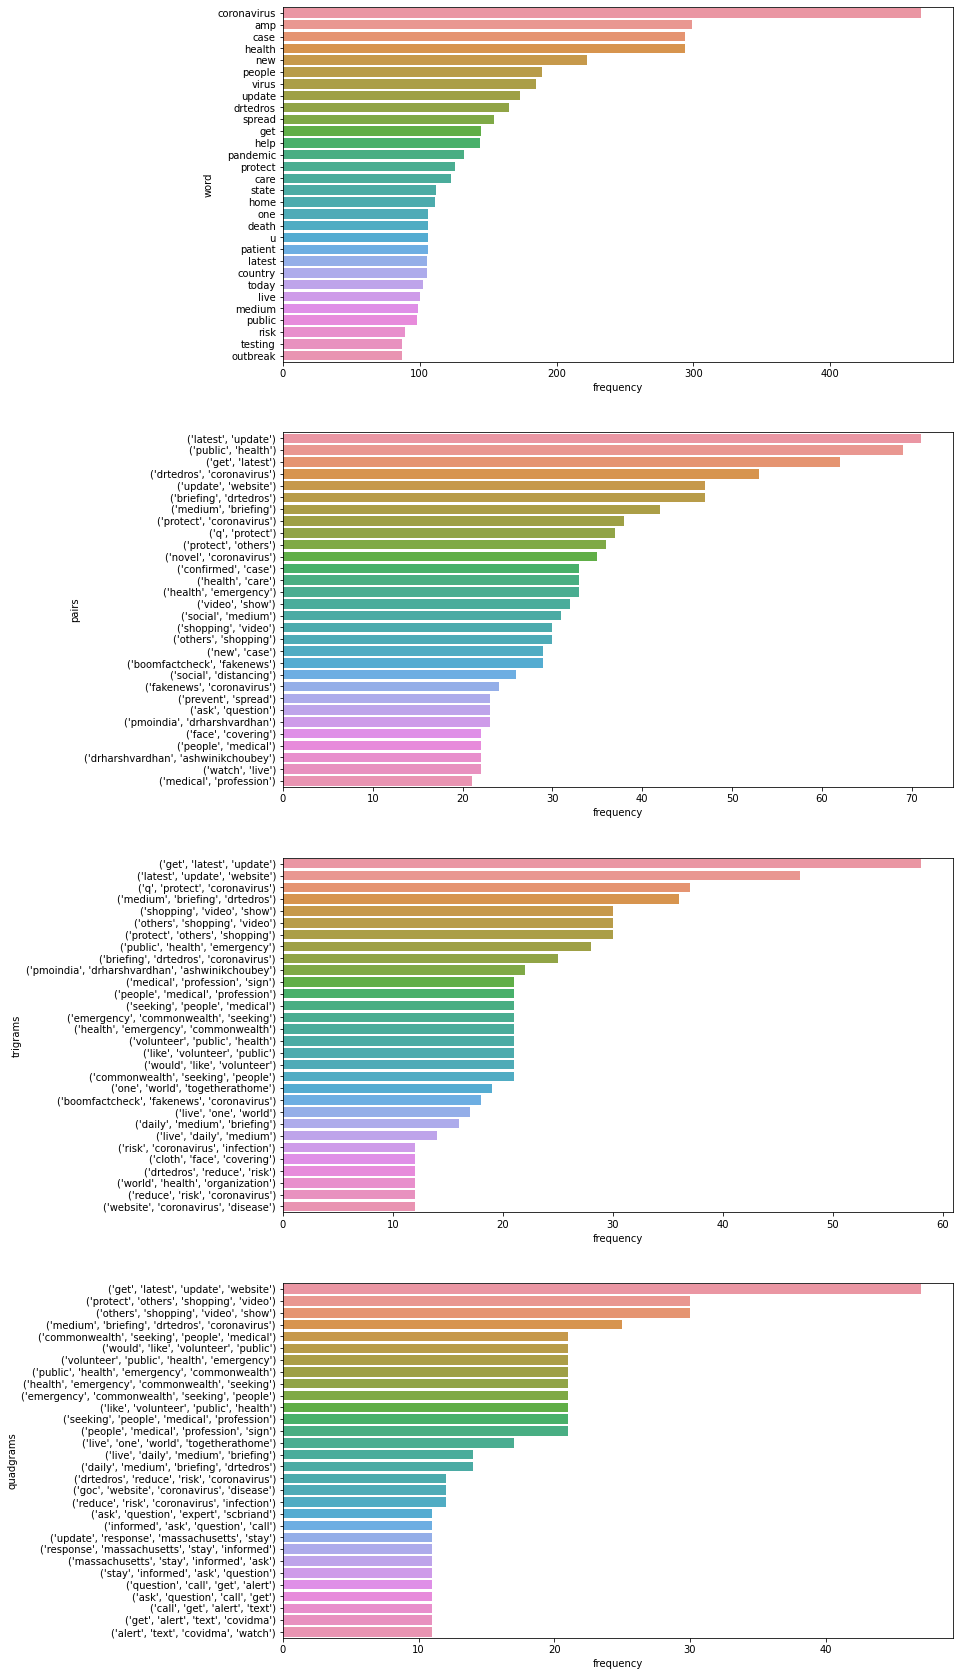

In [ ]:
# create subplot of the different data frames
fig, axes = plt.subplots(4,1,figsize=(12,30))
sns.barplot(ax=axes[0], x='frequency', y='word', data=word_freq_real.head(30))
sns.barplot(ax=axes[1], x='frequency', y='pairs', data=word_pairs_real.head(30))
sns.barplot(ax=axes[2], x='frequency', y='trigrams', data=trigrams_real.head(30))
sns.barplot(ax=axes[3], x='frequency', y='quadgrams', data=quadgrams_real.head(30))

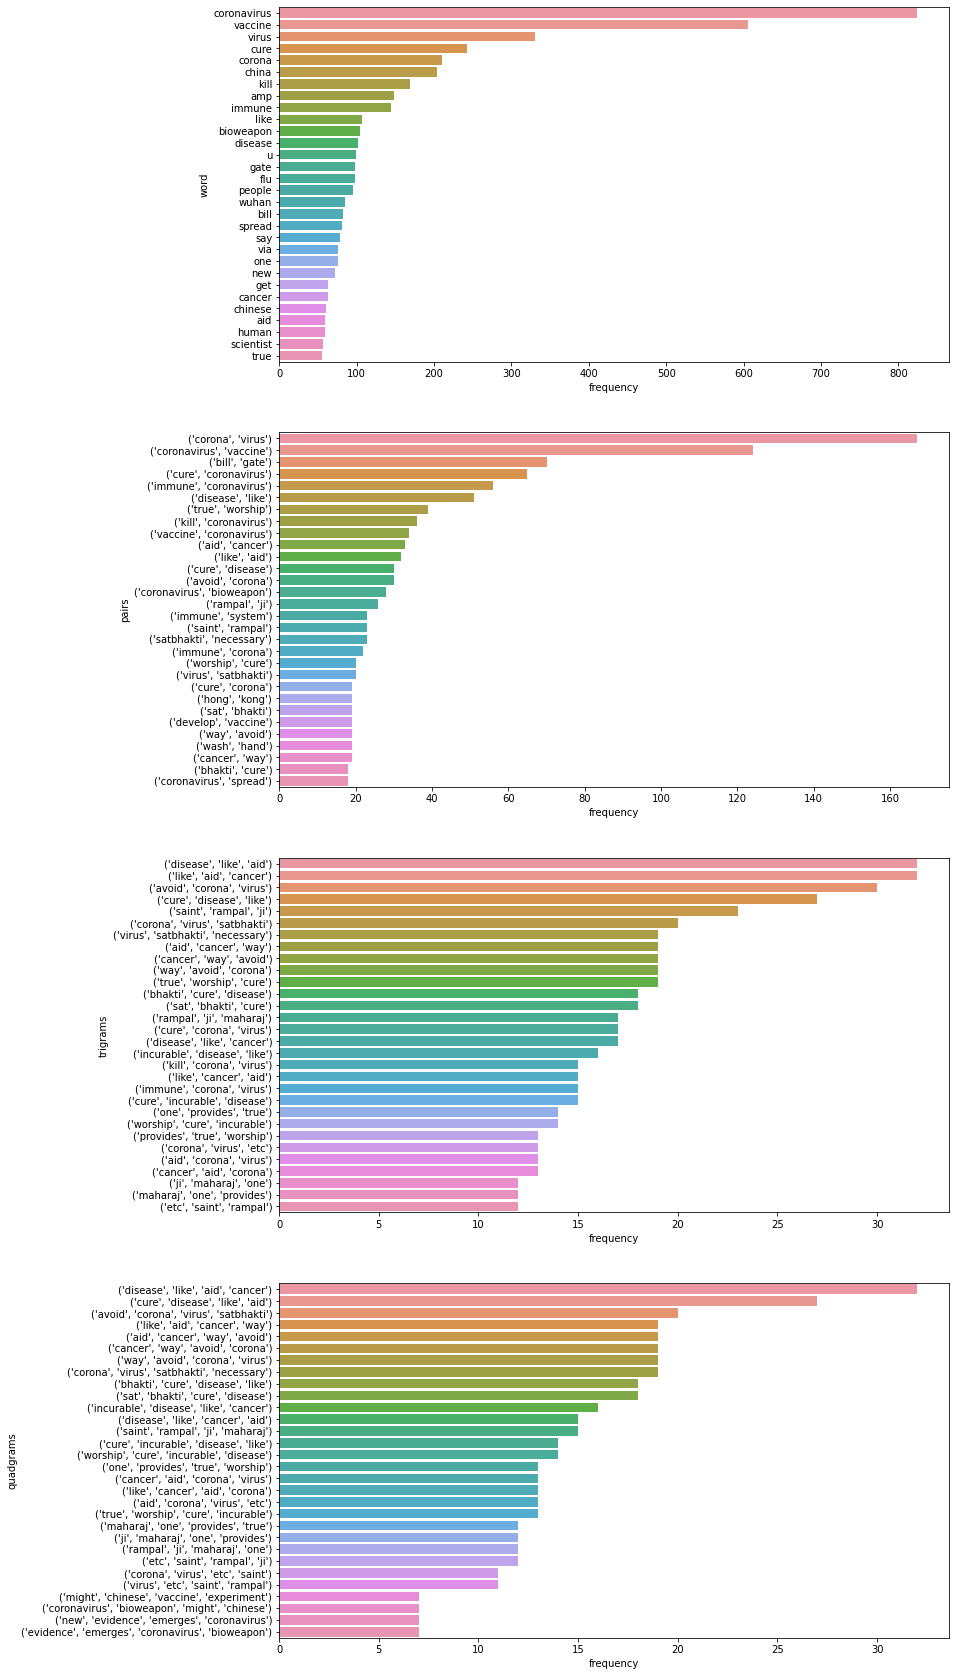

In [ ]:
# create subplot of the different data frames
fig, axes = plt.subplots(4,1,figsize=(12,30))
sns.barplot(ax=axes[0], x='frequency', y='word', data=word_freq_fake.head(30))
sns.barplot(ax=axes[1], x='frequency', y='pairs', data=word_pairs_fake.head(30))
sns.barplot(ax=axes[2], x='frequency', y='trigrams', data=trigrams_fake.head(30))
sns.barplot(ax=axes[3], x='frequency', y='quadgrams', data=quadgrams_fake.head(30))

## Word Cloud

### Single word analysis

In [ ]:

all_real_tweets = ". ".join(df_real_clean["tweet"])
real_wordcloud = WordCloud(collocations=False).generate(all_real_tweets)

all_fake_tweets = ". ".join(df_fake_clean["tweet"])
fake_wordcloud = WordCloud(collocations=False).generate(all_fake_tweets)

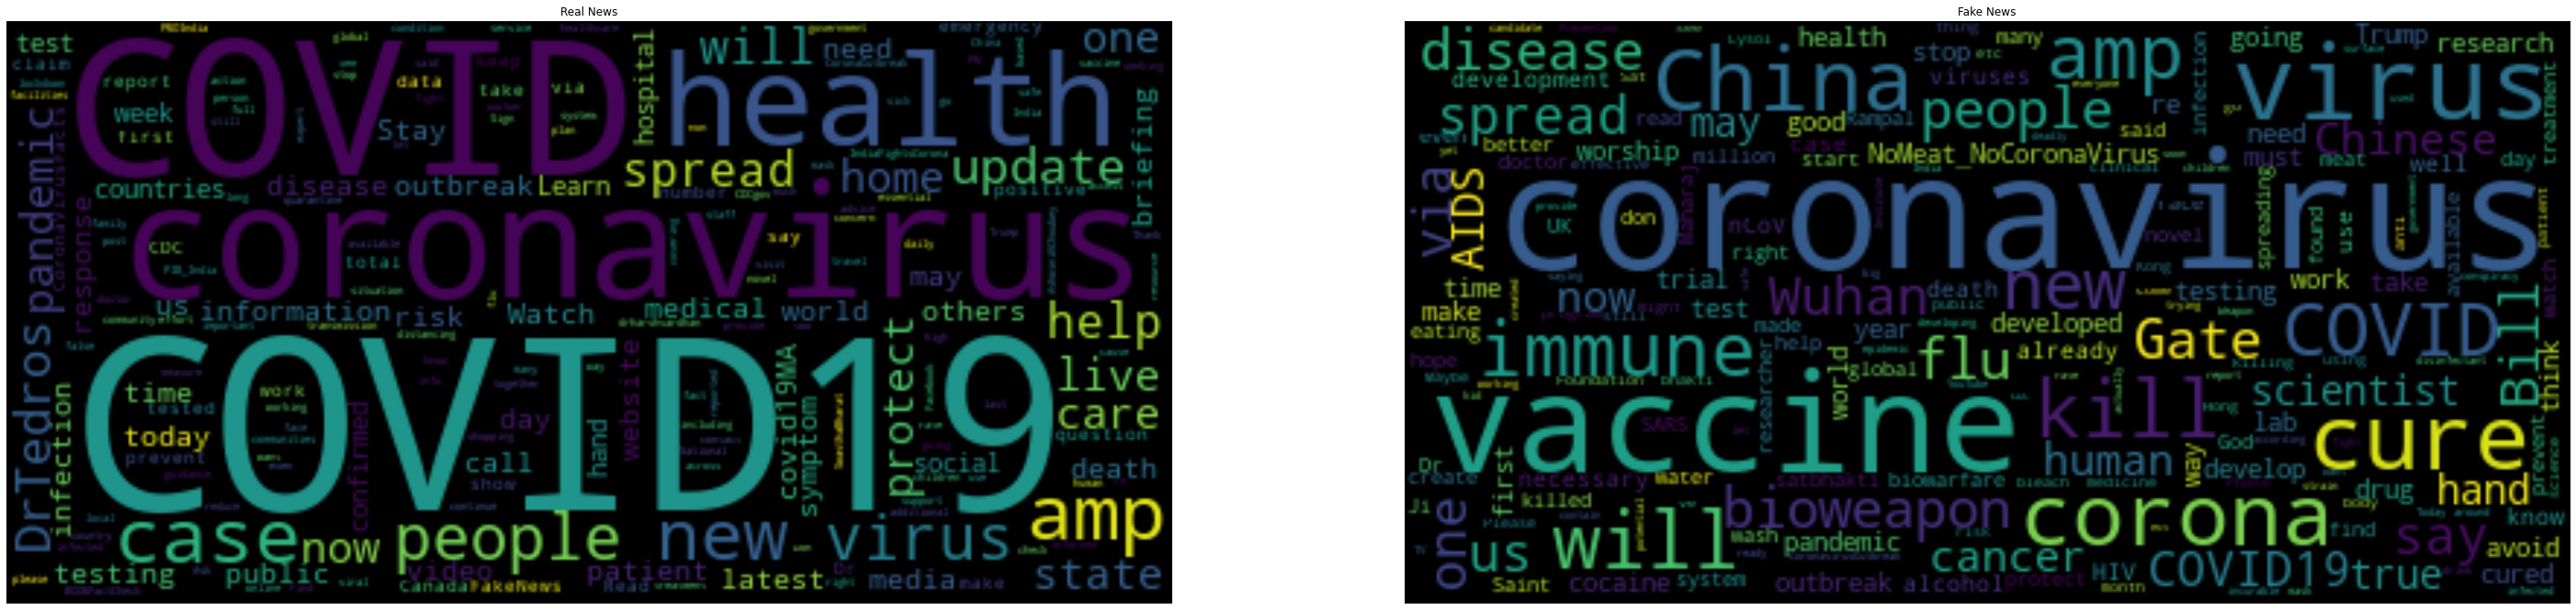

In [ ]:
fig2, ax3 = plt.subplots(nrows=1, ncols=2, figsize=(50,50))

ax3[0].imshow(real_wordcloud, interpolation='bilinear')
ax3[0].title.set_text("Real News")
ax3[0].axis("off")
ax3[1].imshow(fake_wordcloud, interpolation='bilinear')
ax3[1].title.set_text("Fake News")
ax3[1].axis("off")

plt.axis("off")
plt.show()

### Pairs analysis

In [ ]:
real_pair_dict = dict()
for index, content in word_pairs_real.iterrows():
    pair = "_".join(content["pairs"])
    real_pair_dict[pair] = content["frequency"]

fake_pair_dict = dict()
for index, content in word_pairs_fake.iterrows():
    pair = "_".join(content["pairs"])
    fake_pair_dict[pair] = content["frequency"]


In [ ]:
real_pair_wordcloud = WordCloud(collocations=False).generate_from_frequencies(real_pair_dict)
fake_pair_wordcloud = WordCloud(collocations=False).generate_from_frequencies(fake_pair_dict)

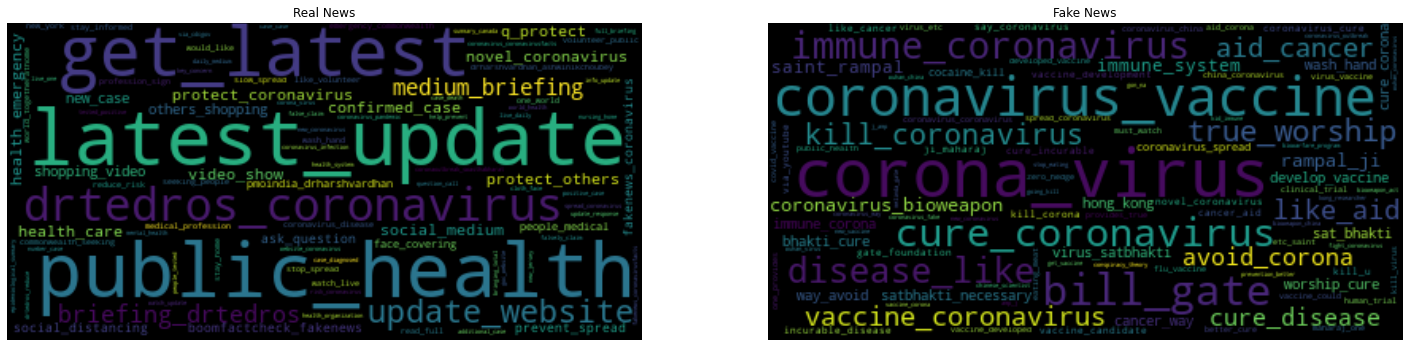

In [ ]:
fig2, ax4 = plt.subplots(nrows=1, ncols=2, figsize=(25,25))

ax4[0].imshow(real_pair_wordcloud, interpolation='bilinear')
ax4[0].title.set_text("Real News")
ax4[0].axis("off")
ax4[1].imshow(fake_pair_wordcloud, interpolation='bilinear')
ax4[1].title.set_text("Fake News")
ax4[1].axis("off")

plt.axis("off")
plt.show()

## Hashtag Analysis

In [ ]:
#df_real_clean["hashtags"].head(10)

In [ ]:
# Create a list with all the hashtags in a single row

hashtag_list_real = []
hashtag_list_fake = []

for i in range(len(df_real_clean)):
    ht = df_real_clean.iloc[i]['hashtags']
    if len(ht)>0 :
        for j in range(len(ht)):
            hashtag_list_real.append(ht[j])

for i in range(len(df_fake_clean)):
    ht = df_fake_clean.iloc[i]['hashtags']
    if len(ht)>0 :
        for j in range(len(ht)):
            hashtag_list_fake.append(ht[j])


### In a bar plot

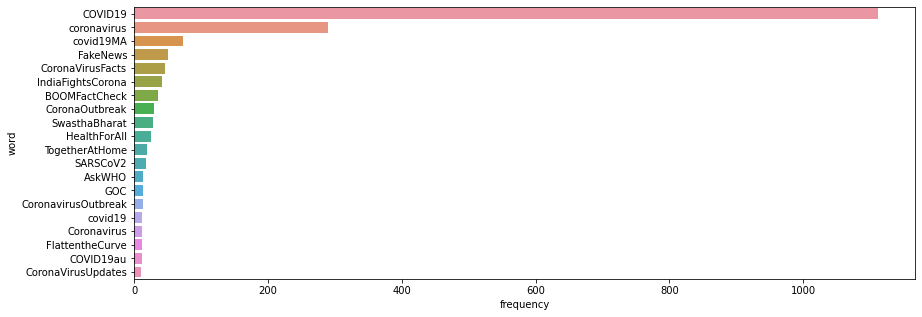

In [ ]:
# Create a data frame with the frequencies of each hashtag
freq_real = Counter(hashtag_list_real)
tag_freq_real = pd.DataFrame(freq_real.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

# create subplot of the different data frames
fig, axes = plt.subplots(1,1,figsize=(14,5))
sns.barplot(ax=axes, x='frequency', y='word', data=tag_freq_real.head(20), label='big')

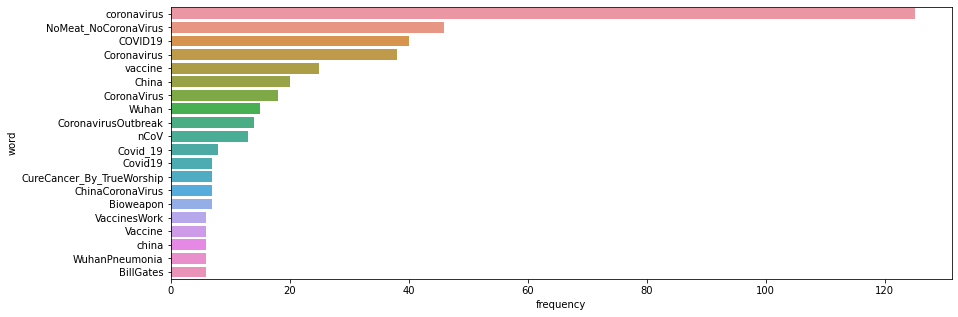

In [ ]:
# Create a data frame with the frequencies of each hashtag
freq_fake = Counter(hashtag_list_fake)

tag_freq_fake = pd.DataFrame(freq_fake.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

# create subplot of the different data frames
fig, axes = plt.subplots(1,1,figsize=(14,5))
sns.barplot(ax=axes, x='frequency', y='word', data=tag_freq_fake.head(20), label='big')

### Word Cloud for hashtag analysis

In [ ]:
all_real_hashtags = ". ".join(hashtag_list_real)
real_ht_wordcloud = WordCloud(collocations=False).generate(all_real_hashtags)

all_fake_hashtags = ". ".join(hashtag_list_fake)
fake_ht_wordcloud = WordCloud(collocations=False).generate(all_fake_hashtags)

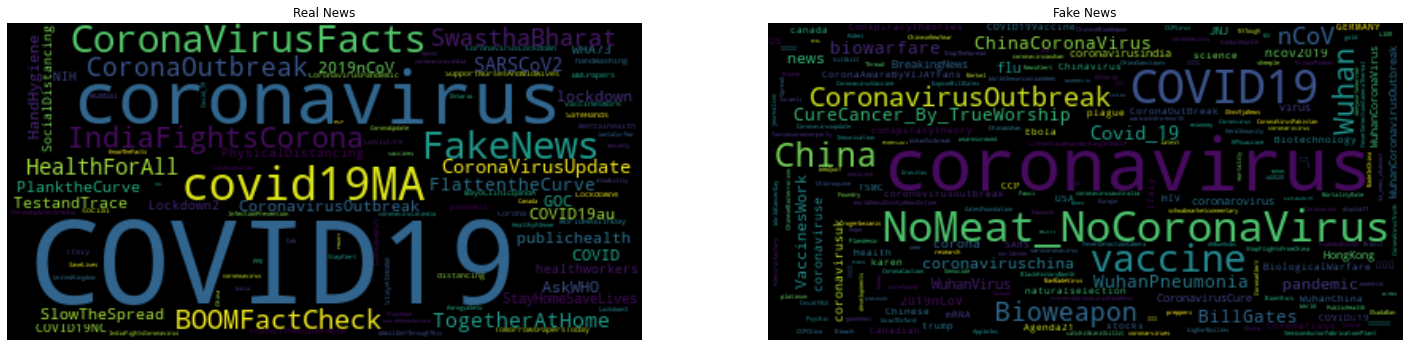

In [ ]:
fig2, ax3 = plt.subplots(nrows=1, ncols=2, figsize=(25,25))

ax3[0].imshow(real_ht_wordcloud, interpolation='bilinear')
ax3[0].title.set_text("Real News")
ax3[0].axis("off")
ax3[1].imshow(fake_ht_wordcloud, interpolation='bilinear')
ax3[1].title.set_text("Fake News")
ax3[1].axis("off")

plt.axis("off")
plt.show()

## Retweets and Favorites Analysis

Average retweets for real news: 406.6652763295099
Average retweets for fake news: 318.6569343065693


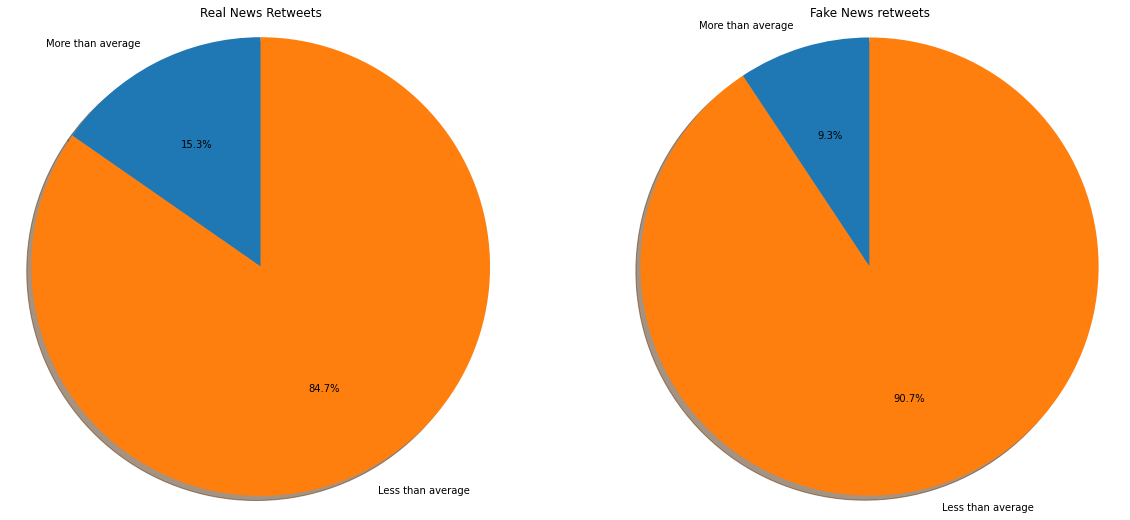

In [ ]:
# Extracting average number of retweets for both real and fake news

def get_average_retweets(dataframe):
    total_rtw = 0
    total_tw = len(df_real_clean)

    for i in range(len(dataframe)):
        total_rtw = total_rtw + dataframe.iloc[i]['retweets']

    avg_rt = total_rtw / total_tw
    return avg_rt

print('Average retweets for real news:', get_average_retweets(df_real_clean))
print('Average retweets for fake news:',get_average_retweets(df_fake_clean))

avg_rt_real = get_average_retweets(df_real_clean)
avg_rt_fake = get_average_retweets(df_fake_clean)

more_than_average_real = 0
less_than_average_real = 0
for i in range(len(df_real_clean)):
    retweetsi = df_real_clean.iloc[i]["retweets"]
    if (retweetsi>avg_rt_real):
        more_than_average_real += 1
    else:
        less_than_average_real += 1

avg_rt_list_real = [more_than_average_real, less_than_average_real]


more_than_average_fake = 0
less_than_average_fake = 0
for i in range(len(df_fake_clean)):
    retweetsi = df_fake_clean.iloc[i]["retweets"]
    if (retweetsi>avg_rt_fake):
        more_than_average_fake += 1
    else:
        less_than_average_fake += 1

avg_rt_list_fake = [more_than_average_fake, less_than_average_fake]


rt_labels = ['More than average ','Less than average']

fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(20,9))

ax2[0].pie(avg_rt_list_real,  labels=rt_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax2[0].axis('equal')
ax2[0].title.set_text("Real News Retweets")

ax2[1].pie(avg_rt_list_fake,  labels=rt_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2[1].axis('equal')
ax2[1].title.set_text("Fake News retweets")
plt.show()



Average favorites for real news: 1086.594369134515
Average favorites for fake news: 1331.1814389989572


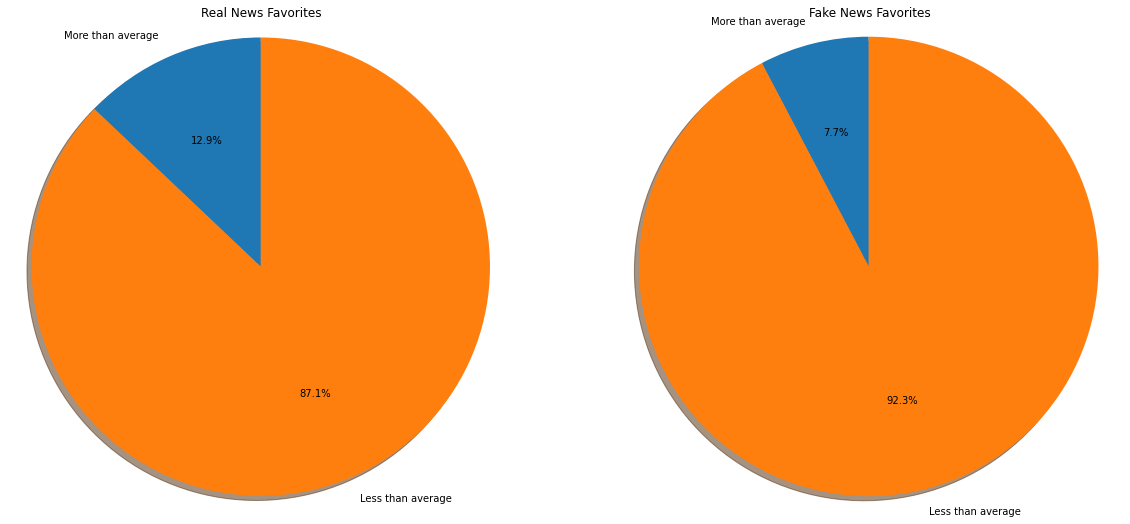

In [ ]:
# Extracting average number of favorites  for both real and fake news

def get_average_favorites(dataframe):
    total_fav = 0
    total_tw = len(df_real_clean)

    for i in range(len(dataframe)):
        total_fav = total_fav + dataframe.iloc[i]['favorites']

    avg_fav = total_fav / total_tw
    return avg_fav

print('Average favorites for real news:',get_average_favorites(df_real_clean))
print('Average favorites for fake news:',get_average_favorites(df_fake_clean))

avg_fav_real = get_average_favorites(df_real_clean)
avg_fav_fake = get_average_favorites(df_fake_clean)

more_than_average_real = 0
less_than_average_real = 0
for i in range(len(df_real_clean)):
    favsi = df_real_clean.iloc[i]["favorites"]
    if (favsi>avg_fav_real):
        more_than_average_real += 1
    else:
        less_than_average_real += 1

avg_fav_list_real = [more_than_average_real, less_than_average_real]


more_than_average_fake = 0
less_than_average_fake = 0
for i in range(len(df_fake_clean)):
    favsi = df_fake_clean.iloc[i]["favorites"]
    if (favsi>avg_fav_fake):
        more_than_average_fake += 1
    else:
        less_than_average_fake += 1

avg_fav_list_fake = [more_than_average_fake, less_than_average_fake]


fav_labels = ['More than average ','Less than average']

fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(20,9))

ax2[0].pie(avg_fav_list_real,  labels=fav_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax2[0].axis('equal')
ax2[0].title.set_text("Real News Favorites")

ax2[1].pie(avg_fav_list_fake,  labels=fav_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2[1].axis('equal')
ax2[1].title.set_text("Fake News Favorites")
plt.show()



## Location Analysis

In [ ]:
# Create a list with all the hashtags in a single row

location_list_real = []
location_list_fake = []

for i in range(len(df_real_clean)):
    locationi = df_real_clean.iloc[i]['location']
    location_list_real.append(locationi)


for i in range(len(df_fake_clean)):
    locationi = df_fake_clean.iloc[i]['location']
    location_list_fake.append(locationi)

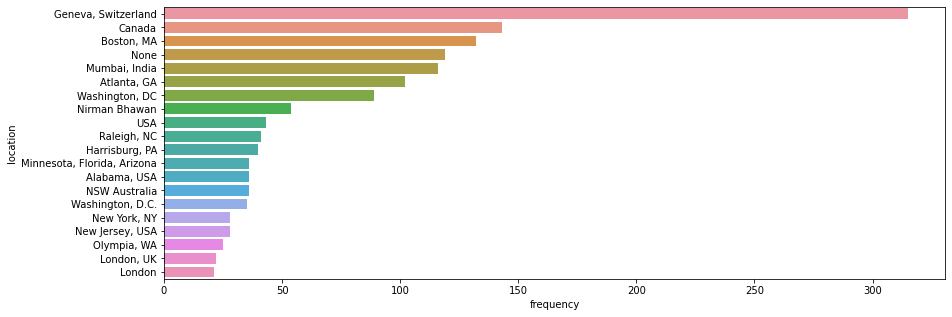

In [ ]:
# Create a data frame with the frequencies of each location
freq_location_real = Counter(location_list_real)
freq_location_fake = Counter(location_list_fake)



location_freq_real = pd.DataFrame(freq_location_real.items(),columns=['location','frequency']).sort_values(by='frequency',ascending=False)

# create plot of real data frame
fig, axes = plt.subplots(1,1,figsize=(14,5))
sns.barplot(ax=axes, x='frequency', y='location', data=location_freq_real.head(20), label='big')



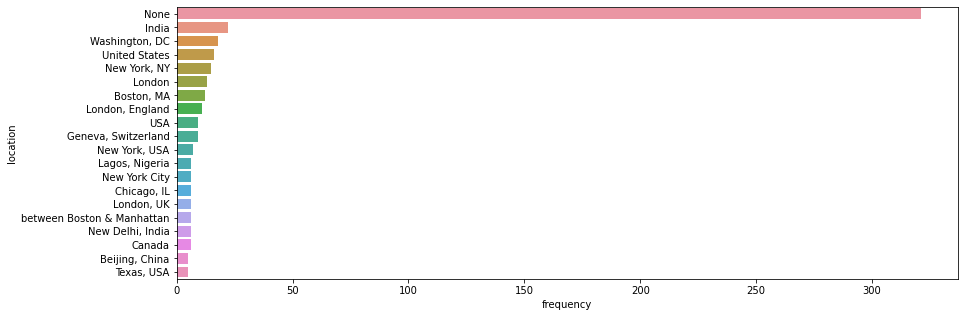

In [ ]:
# Create a data frame with the frequencies of each location

freq_location_fake = Counter(location_list_fake)

location_freq_fake = pd.DataFrame(freq_location_fake.items(),columns=['location','frequency']).sort_values(by='frequency',ascending=False)

# create plot of fake data frame
fig, axes = plt.subplots(1,1,figsize=(14,5))
sns.barplot(ax=axes, x='frequency', y='location', data=location_freq_fake.head(20), label='big')


##  Accounts and Number of Followers Analysis

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128141 missing from current font.
  font.set_text(s, 0, flags=flags)


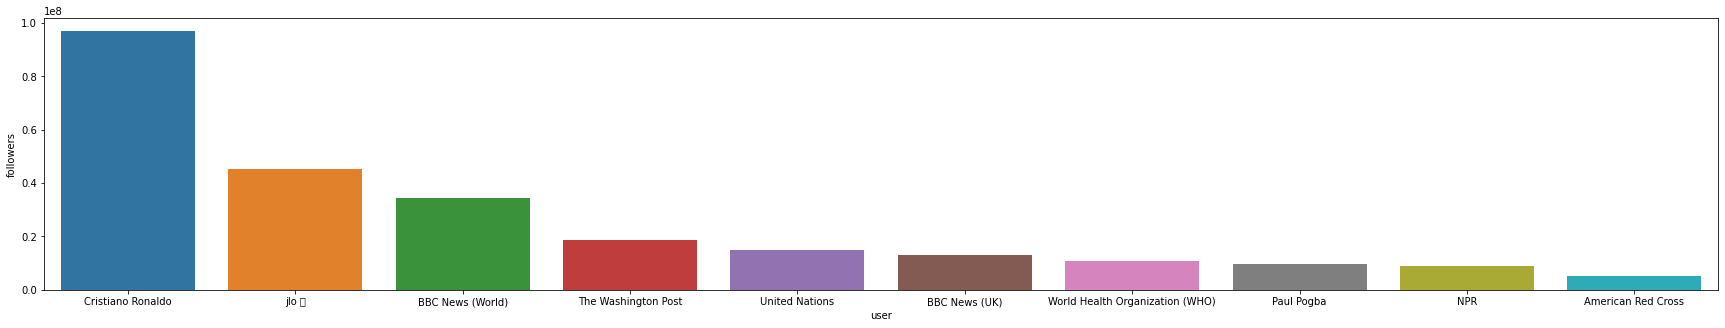

In [ ]:
#Create dataframe with user and followers sorted by number of followers
user_followers_real = df_real_clean[["user_id","screen_name","user","followers"]].sort_values(by='followers',ascending=False).drop_duplicates(subset=["user"])
user_followers_fake = df_fake_clean[["user_id","screen_name","user","followers"]].sort_values(by='followers',ascending=False).drop_duplicates(subset=["user"])

user_followers_real.head(10)
user_followers_fake.head(10)

# create plot of real dataframe with 10 sources for real news with more followers
fig, axes = plt.subplots(1,1,figsize=(30,5))
sns.barplot(ax=axes, x='user', y='followers', data=user_followers_real.head(10), label='big')

In [ ]:
user_followers_real.head(10)
#user_followers_fake.head(10)

user_id     screen_name                             user  followers
1129   155659213       Cristiano                Cristiano Ronaldo   97067865
546     85603854             JLo                            jlo 💍   45219936
1852      742143        BBCWorld                 BBC News (World)   34330654
1706     2467791  washingtonpost              The Washington Post   18649653
893     14159148              UN                   United Nations   14796855
881       612473         BBCNews                    BBC News (UK)   13203407
1105    14499829             WHO  World Health Organization (WHO)   10635029
833   2491702663       paulpogba                       Paul Pogba    9703233
70       5392522             NPR                              NPR    8852581
728      6519522        RedCross               American Red Cross    5157950

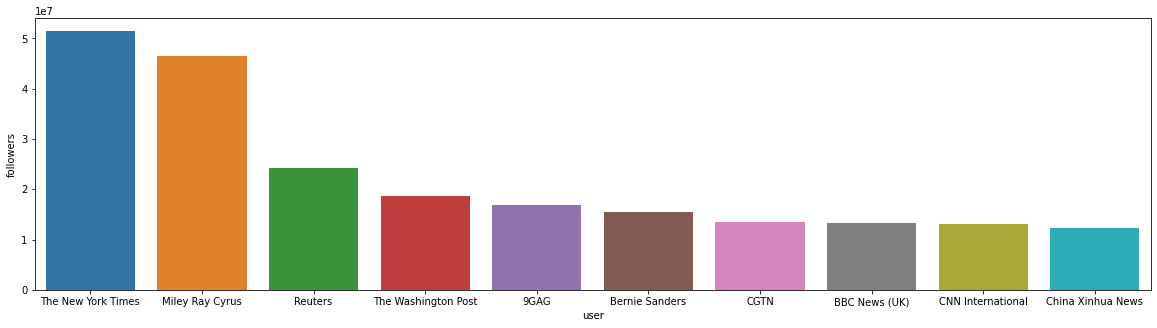

In [ ]:
#Create dataframe with user and followers sorted by number of followers
user_followers_fake = df_fake_clean[["user_id","screen_name","user","followers"]].sort_values(by='followers',ascending=False).drop_duplicates(subset=["user"])

user_followers_fake.head(10)

# create plot of fake dataframe with 10 sources for real news with more followers
fig, axes = plt.subplots(1,1,figsize=(20,5))
sns.barplot(ax=axes, x='user', y='followers', data=user_followers_fake.head(10), label='big')

In [ ]:
user_followers_fake.head(10)

user_id     screen_name                 user  followers
1173      807095         nytimes   The New York Times   51490457
208    268414482      MileyCyrus      Miley Ray Cyrus   46491869
212      1652541         Reuters              Reuters   24228743
203      2467791  washingtonpost  The Washington Post   18649653
85      16548023            9GAG                 9GAG   16849199
1237   216776631   BernieSanders       Bernie Sanders   15445932
319   1115874631    CGTNOfficial                 CGTN   13400904
536       612473         BBCNews        BBC News (UK)   13203407
467      2097571            cnni    CNN International   13088522
238    487118986          XHNews    China Xinhua News   12323192

### Show relation between users' followers and frequency they appear in tweets

['World Health Organization (WHO)', 'World Health Organization (WHO)', 'The Daily Beast', 'BOOM Live', 'Mass. Public Health', 'Dr. Theresa Tam', 'World Health Organization (WHO)', 'WebMD', 'World Health Organization (WHO)', 'Ministry of Health', 'World Health Organization (WHO)', 'BOOM Live', 'World Health Organization (WHO)', 'GaDeptPublicHealth', 'PA Department of Health', 'World Health Organization (WHO)', 'NEJM', 'PA Department of Health', 'SM Hoax Slayer', 'Health Canada and PHAC', 'NPR', 'BOOM Live', 'Health Canada and PHAC', 'World Health Organization (WHO)', 'World Health Organization (WHO)', 'BOOM Live', 'BOOM Live', 'SM Hoax Slayer', 'SAMHSA', 'FactCheck.org', 'WebMD', 'PolitiFact', 'SM Hoax Slayer', 'World Health Organization (WHO)', 'World Health Organization (WHO)', 'CNN Politics', 'BOOM Live', 'World Health Organization (WHO)', 'NCDHHS', 'NJDOH', 'NIH Pakistan', 'BOOM Live', 'Dr. Theresa Tam', 'World Health Organization (WHO)', 'Alaska DHSS', 'BBC News (World)', 'CDC', 'W

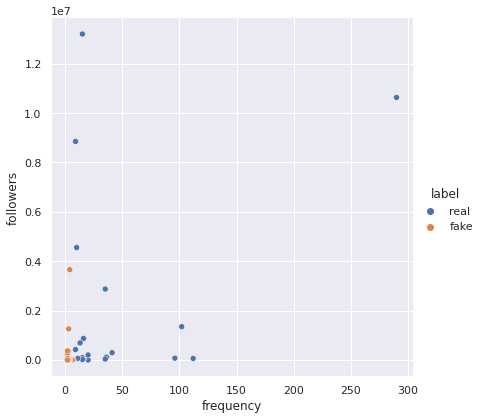

In [ ]:
#Extract the 15 sources of tweets that appears the most in the real news dataframe
accounts_real_list = list(df_real_clean["user"])
print(accounts_real_list)
print(len(accounts_real_list))

user_frequency_r = Counter(accounts_real_list)
print(user_frequency_r)
#Extract the 15 sources of tweets that appears the most in the fake news dataframe
accounts_fake_list = list(df_fake_clean["user"])
print(accounts_fake_list)
print(len(accounts_fake_list))

user_frequency_f = Counter(accounts_fake_list)
print(user_frequency_f)

#Create the dataframes with followers and frequencies
follower_freq_real = df_real_clean[["user_id","screen_name","user","followers"]].drop_duplicates(subset=["user"])
freq_real = pd.DataFrame(user_frequency_r.items(),columns=['user','frequency'])
follower_freq_real['frequency'] = freq_real['frequency']
follower_freq_real['label'] = "real"
ffr_sort = follower_freq_real.sort_values(by='frequency',ascending=False)




follower_freq_fake = df_fake_clean[["user_id","screen_name","user","followers"]].drop_duplicates(subset=["user"])
freq_fake = pd.DataFrame(user_frequency_f.items(),columns=['user','frequency'])
follower_freq_fake['frequency'] = freq_fake['frequency']
follower_freq_fake['label'] = "fake"
fff_sort = follower_freq_fake.sort_values(by='frequency',ascending=False)

#Combine both dataframes
combined_data = pd.concat([ffr_sort.head(20),fff_sort.head(20)], axis=0, ignore_index=True)

sns.set_theme()
sns.relplot(
    data=combined_data,
    x="frequency", y="followers",
    hue = "label", height=6
)


In [ ]:
ffr_sort.head(10)
fff_sort.head(10)

user_id     screen_name  ... frequency  label
357  1042530739290402816     Jay34595865  ...       7.0   fake
15              79873154       aqualung_  ...       6.0   fake
178   739687950665945088   bingdrinkkick  ...       4.0   fake
29              16973333     Independent  ...       4.0   fake
9             2423370157  GreatGameIndia  ...       4.0   fake
194           3963028205     JoeyGDNBoss  ...       3.0   fake
458            252751061       Quicktake  ...       3.0   fake
590  1123227507631820803             ozm  ...       3.0   fake
45            1052325553   ParveenKaswan  ...       3.0   fake
668           3397349115     Kleenshave2  ...       3.0   fake

[10 rows x 6 columns]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 10024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128139 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128149 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 10024 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128139 missing from current font.
  font.set_

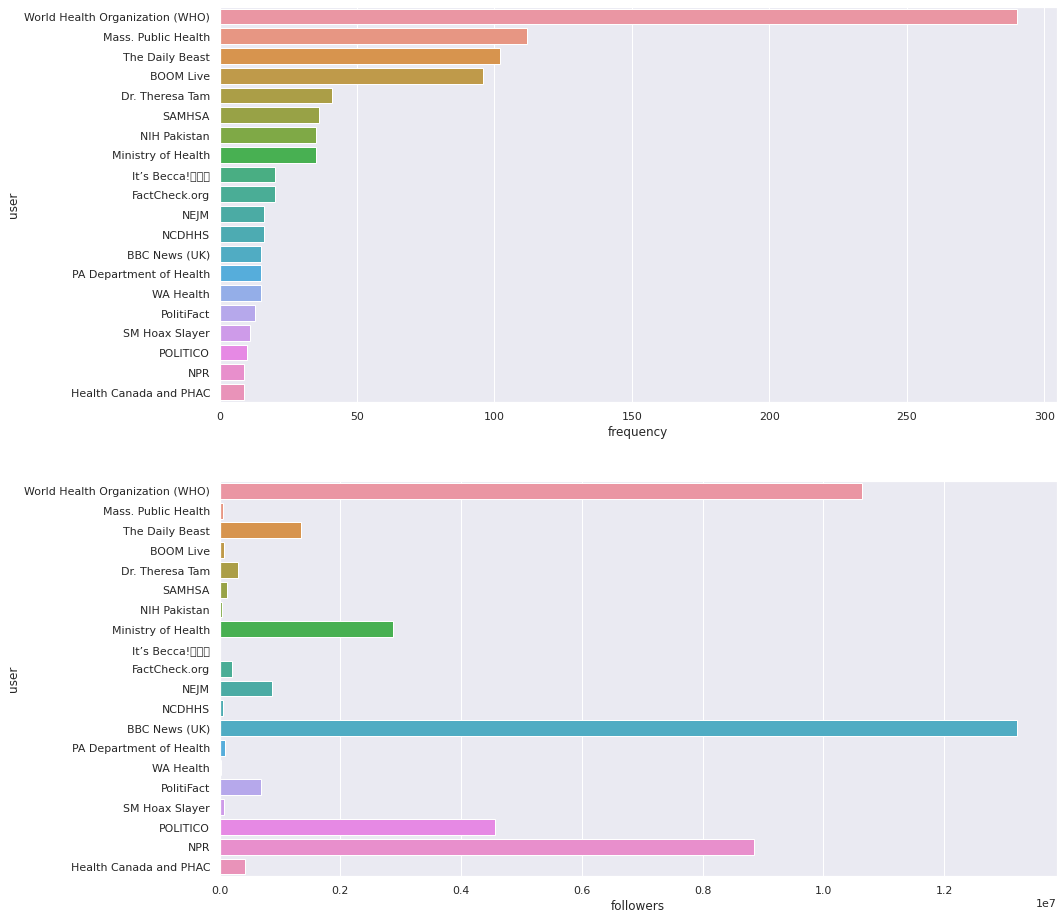

In [ ]:
# Show the 20 sources most used in the real news data frame and their followers
fig, axis = plt.subplots(2,1,figsize=(15,16))
sns.barplot(ax=axis[0], x='frequency', y='user', data=ffr_sort.head(20), label=' big', )
sns.barplot(ax=axis[1], x='followers', y='user', data=ffr_sort.head(20), label='big')



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129506 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128016 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128136 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128025 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128667 missing from current font.
  fon

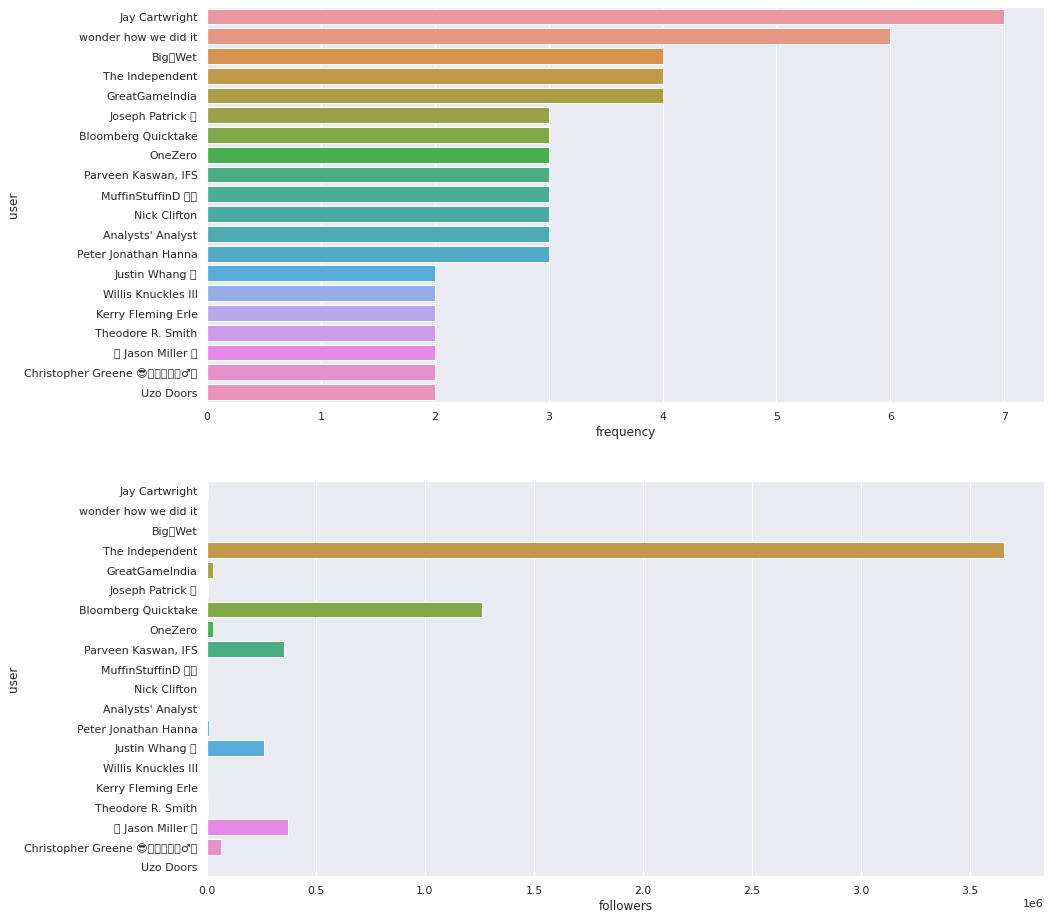

In [ ]:
# Show the 20 sources most used in the fake news data frame and their followers
fig, axis = plt.subplots(2,1,figsize=(15,16))
sns.barplot(ax=axis[0], x='frequency', y='user', data=fff_sort.head(20), label=' big', )
sns.barplot(ax=axis[1], x='followers', y='user', data=fff_sort.head(20), label='big')

## Hashtag network

### Hashtag relation network in real tweets

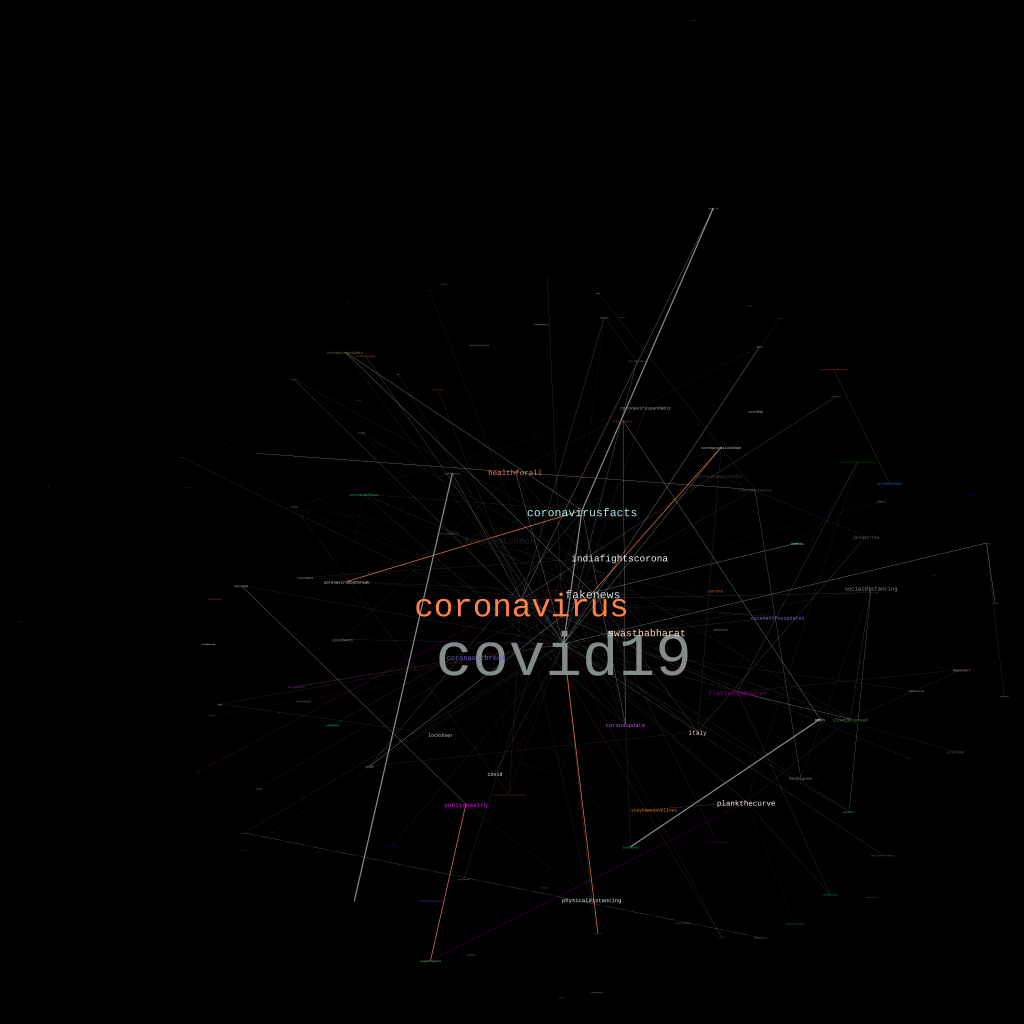

In [ ]:
network_df_real = df_real_clean
#network_df_real['hashtags'] = network_df_real['hashtags'].apply(lambda x: ast.literal_eval(x))

unique_hashtags_real = {}
hashtags_per_tweet_real = {}

for index, row in network_df_real.iterrows():
            if(len(row["hashtags"])>0):
                hashtags_per_tweet_real[row["id"]]= [hashtag.lower() for hashtag in row["hashtags"]]
            for hashtag in row["hashtags"]:
                unique_hashtags_real.setdefault(hashtag.lower(), 0)
                unique_hashtags_real[hashtag.lower()] += 1
#print(unique_hashtags)
#print(hashtags_per_tweet)

# Remove the hashtags that are not repeated in the dataset
min_degree = 1
unique_hashtags_real = { hashtag: unique_hashtags_real[hashtag] for hashtag in unique_hashtags_real
                   if unique_hashtags_real[hashtag]>min_degree }
#print(unique_hashtags)
hp_df_real = pd.DataFrame(0, index=unique_hashtags_real, columns=unique_hashtags_real)

for key in hashtags_per_tweet_real:
    #print(hashtags_per_tweet[key])
    for pair in itertools.product(hashtags_per_tweet_real[key],hashtags_per_tweet_real[key]):
        if pair[0]!=pair[1] and pair[0] in unique_hashtags_real and pair[1] in unique_hashtags_real:
            #print(pair[0]+" and "+pair[1])
            hp_df_real.at[pair[0],pair[1]] += 1
            hp_df_real.at[pair[1],pair[0]] += 1

#Divide all the values by 2 as we have been duplicating them in the last for
hp_df_real = hp_df_real.floordiv(2)

G_df = nx.from_pandas_adjacency(hp_df_real)

colors = ig.drawing.colors.known_colors

g = ig.Graph.from_networkx(G_df)
g.vs["label"] = g.vs["_nx_name"]

visual_style = {}
#node size
visual_style["vertex_size"] = 20
#node color
visual_style["vertex_label_color"] = [random.choice(list(colors.keys())) for v in g.vs()]
#node label
visual_style["vertex_label"] = g.vs["label"]
#node shape
visual_style["vertex_shape"] = "hidden"
#label size
visual_style["vertex_label_size"] = [0.5*degree for degree in g.degree()]
#edge color
visual_style["edge_color"] = visual_style["vertex_label_color"]
#edge thickness
visual_style["edge_width"] = [0.01 *degree for degree in g.degree()]
#bounding box
visual_style["bbox"] = (1024, 1024)
#margin
visual_style["margin"] = 20
#layout
visual_style["layout"] = "kk"
#background
visual_style["background"] = "black"

ig.plot(g, "hashtag_real_net.svg", **visual_style)


### Hashtag relation network in fake tweets

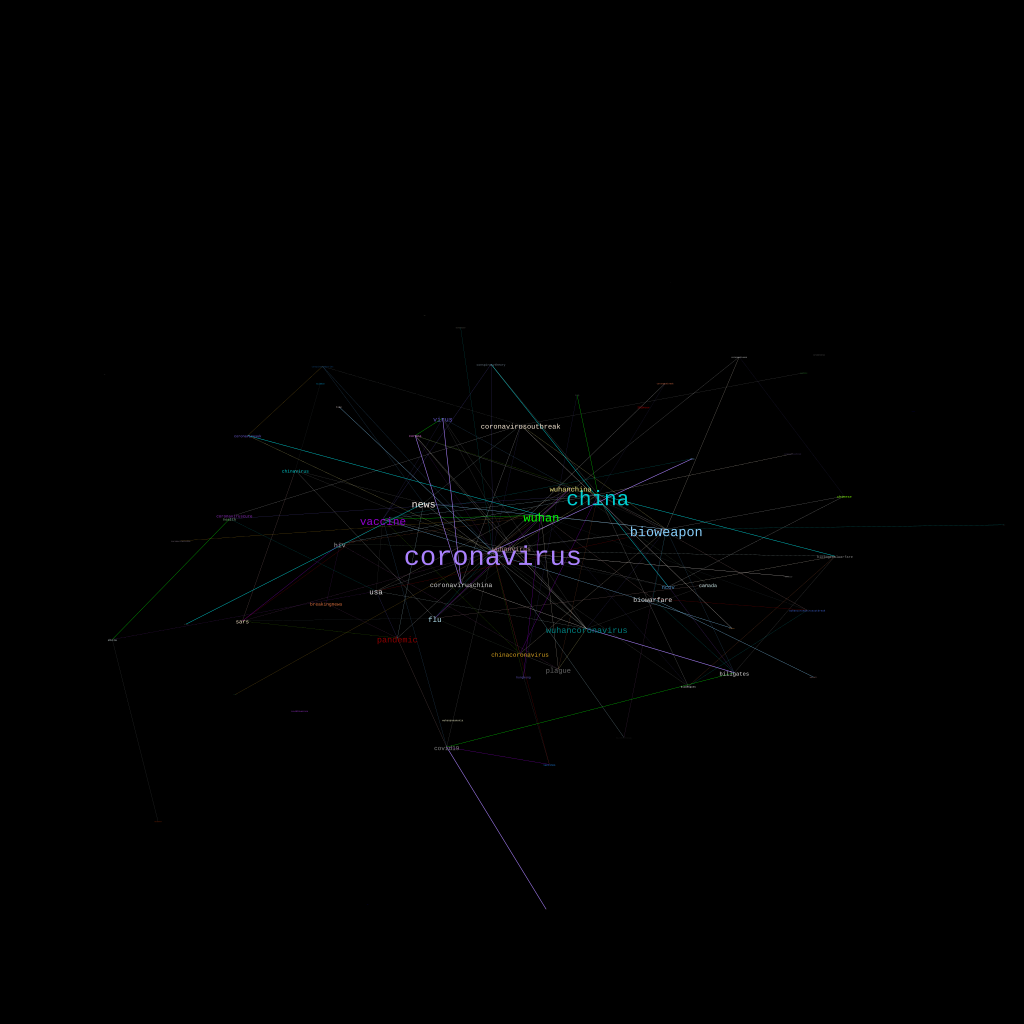

In [ ]:
network_df_fake = df_fake_clean
#network_df_real['hashtags'] = network_df_real['hashtags'].apply(lambda x: ast.literal_eval(x))

unique_hashtags_fake = {}
hashtags_per_tweet_fake = {}

for index, row in network_df_fake.iterrows():
            if(len(row["hashtags"])>0):
                hashtags_per_tweet_fake[row["id"]]= [hashtag.lower() for hashtag in row["hashtags"]]
            for hashtag in row["hashtags"]:
                unique_hashtags_fake.setdefault(hashtag.lower(), 0)
                unique_hashtags_fake[hashtag.lower()] += 1
#print(unique_hashtags)
#print(hashtags_per_tweet)

# Remove the hashtags that are not repeated in the dataset
min_degree = 1
unique_hashtags_fake = { hashtag: unique_hashtags_fake[hashtag] for hashtag in unique_hashtags_fake
                   if unique_hashtags_fake[hashtag]>min_degree }
#print(unique_hashtags)
hp_df_fake = pd.DataFrame(0, index=unique_hashtags_fake, columns=unique_hashtags_fake)

for key in hashtags_per_tweet_fake:
    #print(hashtags_per_tweet[key])
    for pair in itertools.product(hashtags_per_tweet_fake[key],hashtags_per_tweet_fake[key]):
        if pair[0]!=pair[1] and pair[0] in unique_hashtags_fake and pair[1] in unique_hashtags_fake:
            #print(pair[0]+" and "+pair[1])
            hp_df_fake.at[pair[0],pair[1]] += 1
            hp_df_fake.at[pair[1],pair[0]] += 1

#Divide all the values by 2 as we have been duplicating them in the last for
hp_df_fake = hp_df_fake.floordiv(2)

G_df = nx.from_pandas_adjacency(hp_df_fake)

colors = ig.drawing.colors.known_colors

g = ig.Graph.from_networkx(G_df)
g.vs["label"] = g.vs["_nx_name"]

visual_style = {}
#node size
visual_style["vertex_size"] = 20
#node color
visual_style["vertex_label_color"] = [random.choice(list(colors.keys())) for v in g.vs()]
#node label
visual_style["vertex_label"] = g.vs["label"]
#node shape
visual_style["vertex_shape"] = "hidden"
#label size
visual_style["vertex_label_size"] = [0.5*degree for degree in g.degree()]
#edge color
visual_style["edge_color"] = visual_style["vertex_label_color"]
#edge thickness
visual_style["edge_width"] = [0.01 *degree for degree in g.degree()]
#bounding box
visual_style["bbox"] = (1024, 1024)
#margin
visual_style["margin"] = 20
#layout
visual_style["layout"] = "kk"
#background
visual_style["background"] = "black"

ig.plot(g, "hashtag_fake_net.svg", **visual_style)

### Hashtag relation network in all tweets

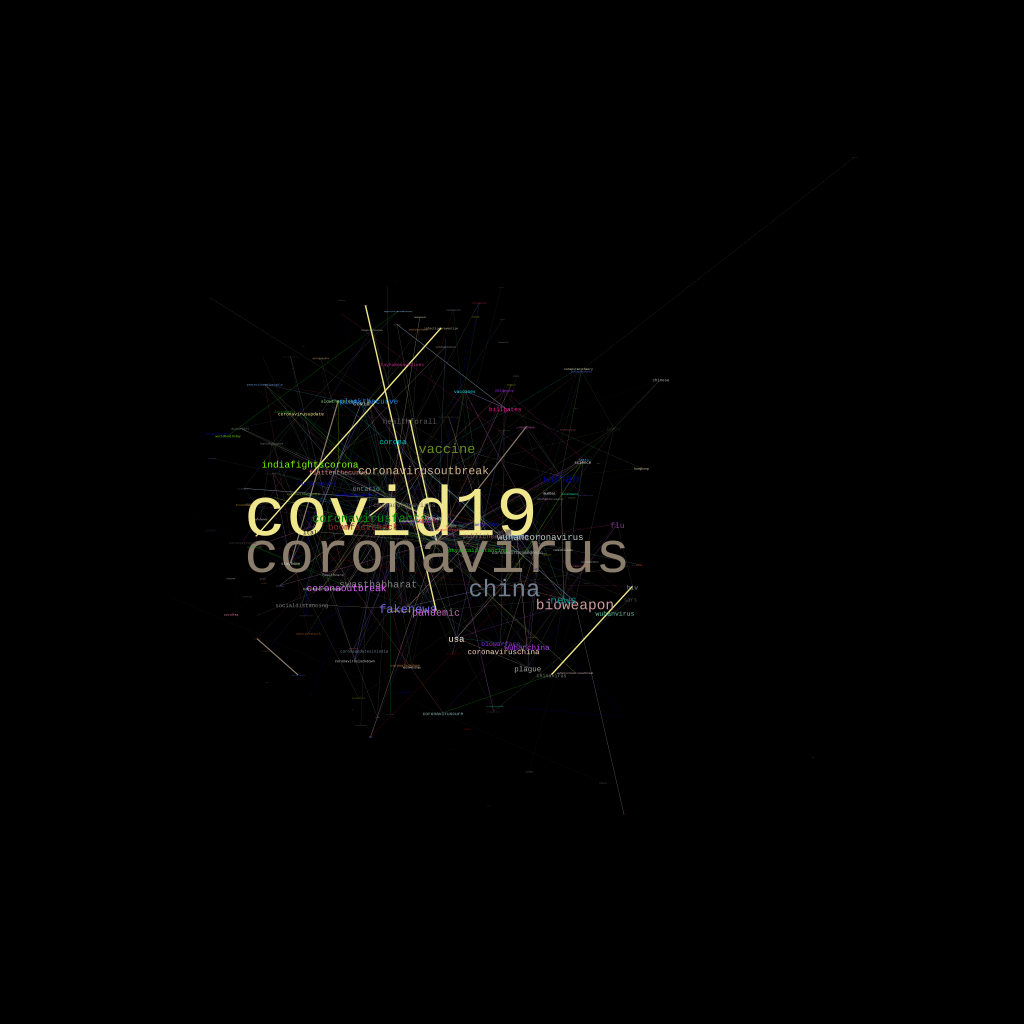

In [ ]:
frames = [df_real_clean, df_fake_clean]
network_df = pd.concat(frames)

unique_hashtags = {}
hashtags_per_tweet = {}

for index, row in network_df.iterrows():
            if(len(row["hashtags"])>0):
                hashtags_per_tweet[row["id"]]= [hashtag.lower() for hashtag in row["hashtags"]]
            for hashtag in row["hashtags"]:
                unique_hashtags.setdefault(hashtag.lower(), 0)
                unique_hashtags[hashtag.lower()] += 1
#print(unique_hashtags)
#print(hashtags_per_tweet)

# Remove the hashtags that are not repeated in the dataset
min_degree = 1
unique_hashtags = { hashtag: unique_hashtags[hashtag] for hashtag in unique_hashtags
                   if unique_hashtags[hashtag]>min_degree }
#print(unique_hashtags)
hp_df = pd.DataFrame(0, index=unique_hashtags, columns=unique_hashtags)

for key in hashtags_per_tweet:
    #print(hashtags_per_tweet[key])
    for pair in itertools.product(hashtags_per_tweet[key],hashtags_per_tweet[key]):
        if pair[0]!=pair[1] and pair[0] in unique_hashtags and pair[1] in unique_hashtags:
            #print(pair[0]+" and "+pair[1])
            hp_df.at[pair[0],pair[1]] += 1
            hp_df.at[pair[1],pair[0]] += 1

#Divide all the values by 2 as we have been duplicating them in the last for
hp_df = hp_df.floordiv(2)

G_df = nx.from_pandas_adjacency(hp_df)

colors = ig.drawing.colors.known_colors

g = ig.Graph.from_networkx(G_df)
g.vs["label"] = g.vs["_nx_name"]

visual_style = {}
#node size
visual_style["vertex_size"] = 20
#node color
visual_style["vertex_label_color"] = [random.choice(list(colors.keys())) for v in g.vs()]
#node label
visual_style["vertex_label"] = g.vs["label"]
#node shape
visual_style["vertex_shape"] = "hidden"
#label size
visual_style["vertex_label_size"] = [0.5*degree for degree in g.degree()]
#edge color
visual_style["edge_color"] = visual_style["vertex_label_color"]
#edge thickness
visual_style["edge_width"] = [0.01 *degree for degree in g.degree()]
#bounding box
visual_style["bbox"] = (1024, 1024)
#margin
visual_style["margin"] = 20
#layout
visual_style["layout"] = "kk"
#background
visual_style["background"] = "black"

ig.plot(g, "hashtag_net.svg", **visual_style)



## Hashtag correlation matrix

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2350 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2337 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2367 missing from current font.
  font.set_text(s

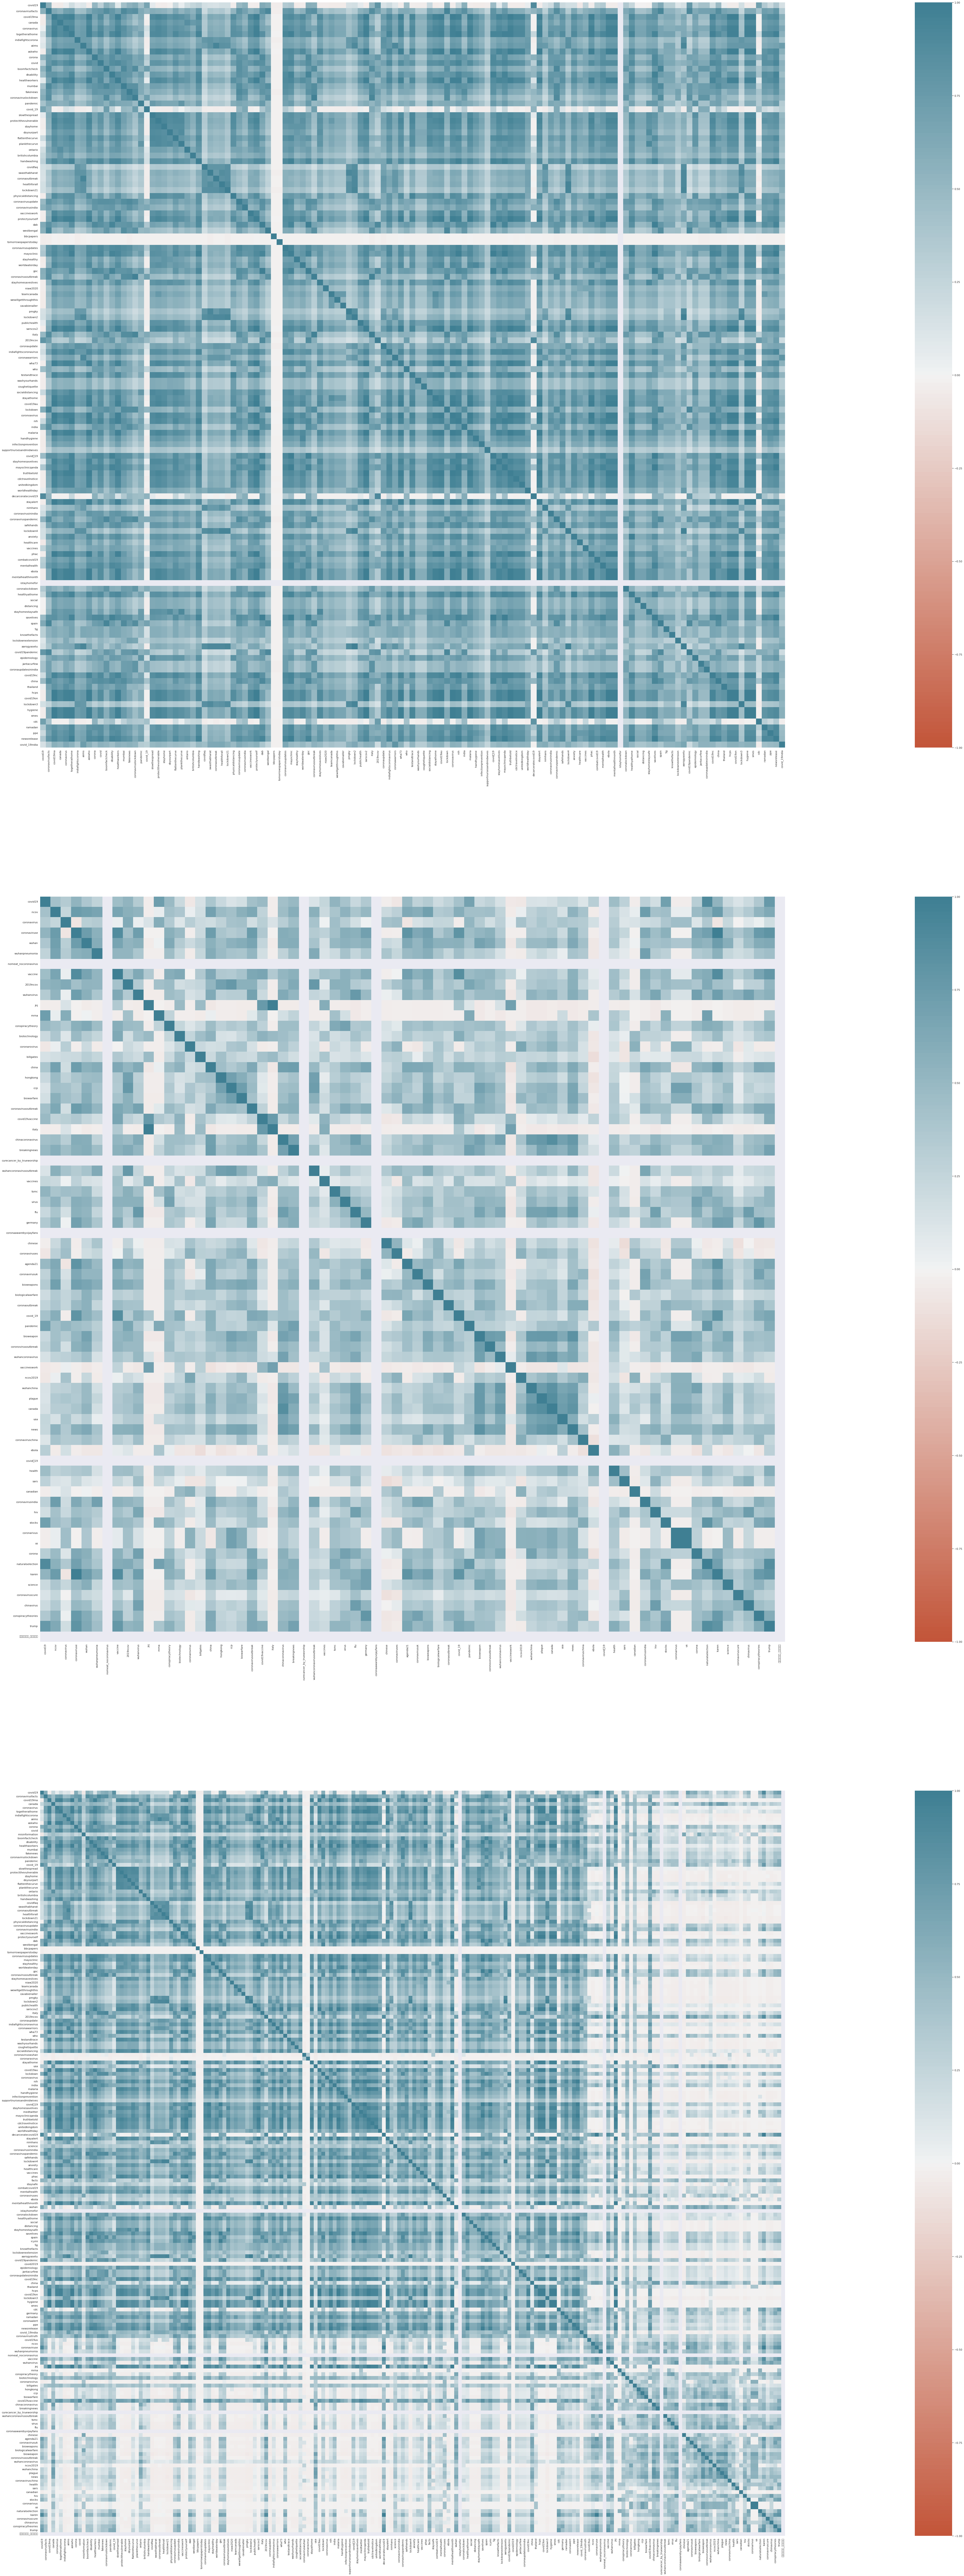

In [ ]:
corrMatrix_real = hp_df_real.corr()
corrMatrix_fake = hp_df_fake.corr()
corrMatrix = hp_df.corr()

fig, axis = plt.subplots(3,1,figsize=(196,196))
sns.heatmap(corrMatrix_real, vmin = -1, vmax = 1, ax=axis[0],cmap=sns.diverging_palette(20, 220, n=200),
            square=True, annot=False)
sns.heatmap(corrMatrix_fake, vmin = -1, vmax = 1, ax=axis[1],  cmap=sns.diverging_palette(20, 220, n=200),
            square=True, annot=False)
sns.heatmap(corrMatrix, vmin = -1, vmax = 1, ax=axis[2], cmap=sns.diverging_palette(20, 220, n=200),
            square=True, annot=False)


In [ ]:
print(corrMatrix_fake)

                     covid19      ncov  ...     trump  मीडिया_वायरस
covid19             1.000000  0.427593  ...  0.767426           NaN
ncov                0.427593  1.000000  ...  0.621468           NaN
coronavirus         0.338844  0.247294  ...  0.187261           NaN
coronaviruse        0.536052  0.745669  ...  0.814615           NaN
wuhan               0.370807  0.711546  ...  0.620520           NaN
...                      ...       ...  ...       ...           ...
coronaviruscure     0.128902  0.242891  ...  0.277846           NaN
chinavirus          0.200734  0.347564  ...  0.386308           NaN
conspiracytheories  0.369850  0.536721  ...  0.600372           NaN
trump               0.767426  0.621468  ...  1.000000           NaN
मीडिया_वायरस             NaN       NaN  ...       NaN           NaN

[72 rows x 72 columns]


### Network with the accounts used in real and fake news

In [ ]:
print(len(ffr_sort))
# We get a list with the id of the accounts of the real news most used
id_accounts_real = list(ffr_sort["user_id"])

# We get a list with the name the accounts of the real news most used
accounts_real = list(ffr_sort["user"])

print(accounts_real[0:10])
print(id_accounts_real[0:10])

# We get the friendships between the 15 accounts most used in real news dataset
id_recorridos=[]
friendship_real = []

for i in range(len(id_accounts_real[0:15])):

  source_id = id_accounts_real[i]
  for j in range(len(id_accounts_real[0:15])):
    dest_id = id_accounts_real[j]
    if (source_id==dest_id):
      continue
    if(dest_id in id_recorridos):
      continue

    friendship_real.append(api.show_friendship(source_id= source_id,target_id= dest_id))
    id_recorridos.append(source_id)



320
['World Health Organization (WHO)', 'Mass. Public Health', 'The Daily Beast', 'BOOM Live', 'Dr. Theresa Tam', 'SAMHSA', 'NIH Pakistan', 'Ministry of Health', 'It’s Becca!💕✨💋', 'FactCheck.org']
[14499829, 23711785, 16012783, 2392031700, 2314087860, 24959108, 910396806902755328, 2596143056, 49552004, 21344507]


In [ ]:
friendship_real[1]

(Friendship(_api=<tweepy.api.API object at 0x7fc9610dd110>, _json={'id': 14499829, 'id_str': '14499829', 'screen_name': 'WHO', 'following': False, 'followed_by': False, 'live_following': False, 'following_received': None, 'following_requested': None, 'notifications_enabled': None, 'can_dm': True, 'blocking': None, 'blocked_by': None, 'muting': None, 'want_retweets': None, 'all_replies': None, 'marked_spam': None}, id=14499829, id_str='14499829', screen_name='WHO', following=False, followed_by=False, live_following=False, following_received=None, following_requested=None, notifications_enabled=None, can_dm=True, blocking=None, blocked_by=None, muting=None, want_retweets=None, all_replies=None, marked_spam=None),
 Friendship(_api=<tweepy.api.API object at 0x7fc9610dd110>, _json={'id': 16012783, 'id_str': '16012783', 'screen_name': 'thedailybeast', 'following': False, 'followed_by': False, 'following_received': None, 'following_requested': None}, id=16012783, id_str='16012783', screen_nam

105
2


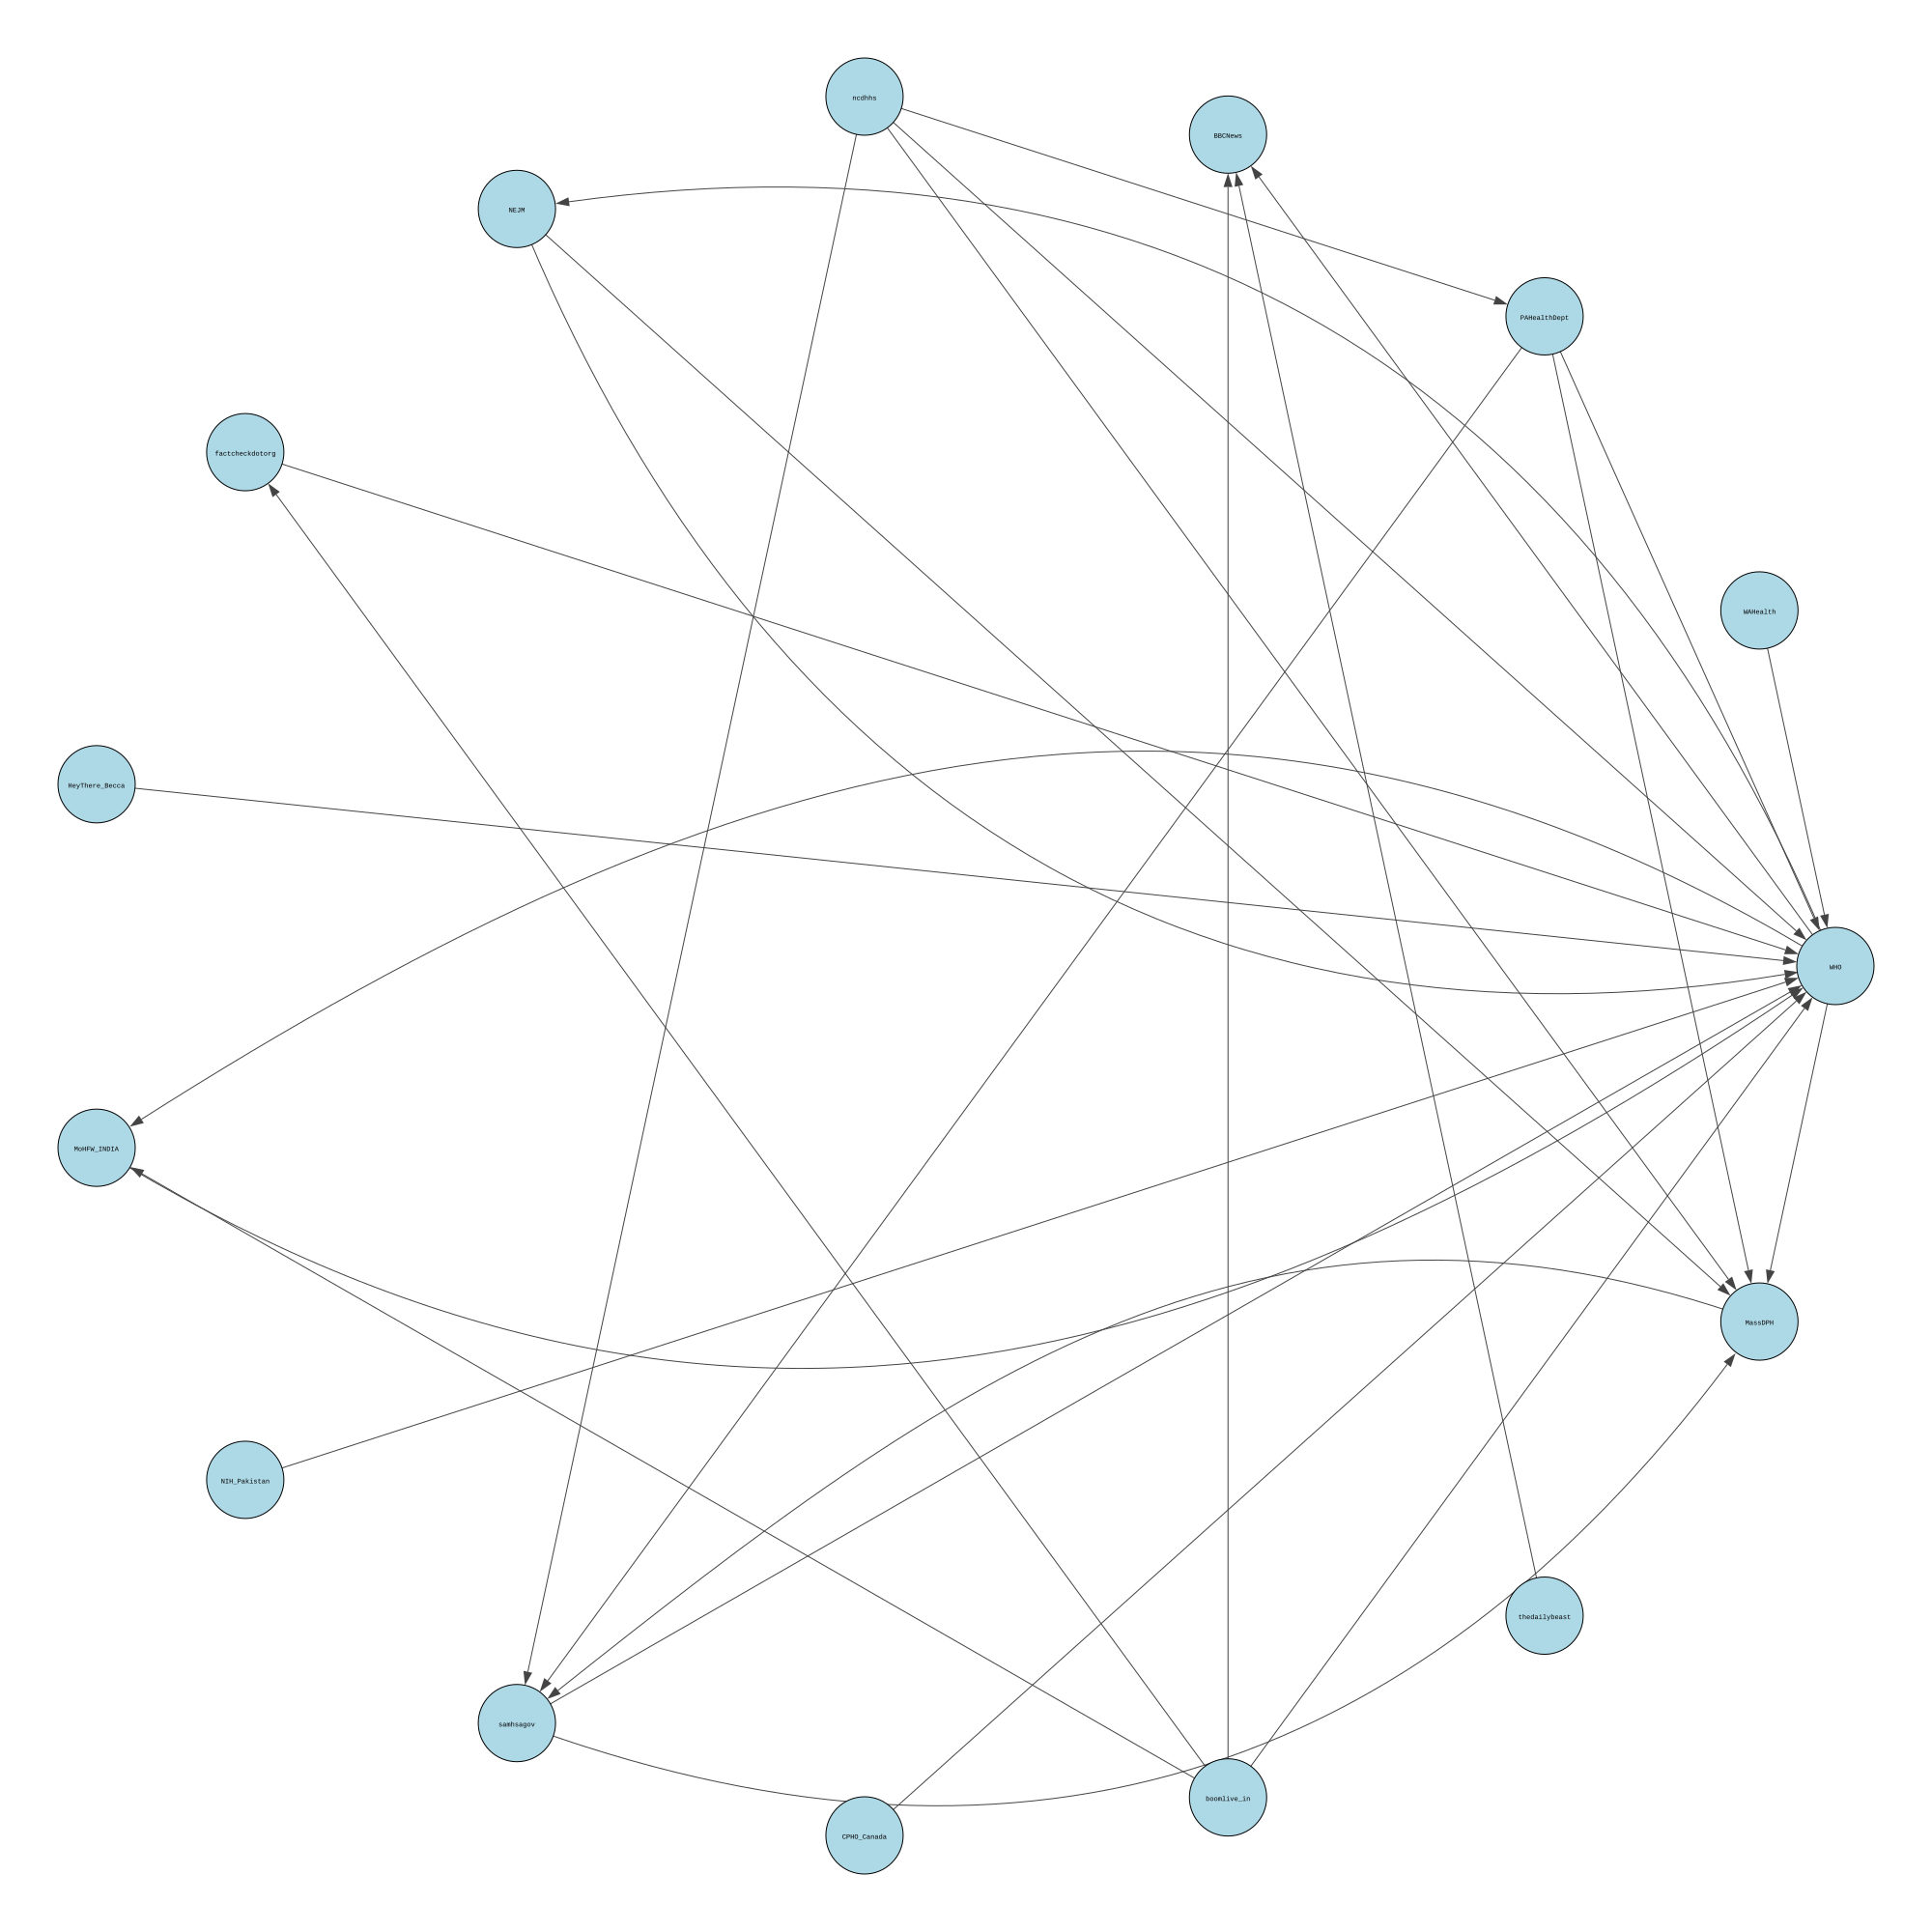

In [ ]:
#Generating the graph of real news

g = Graph(directed=True)

print(len(friendship_real))
print(len(friendship_real[0]))
g.vs["name"]=[]
for i in range(len(friendship_real)):
  source_id = friendship_real[i][0].screen_name
  dest_id = friendship_real[i][1].screen_name
  #print(source_id)
  #print(dest_id)

  if(source_id not in g.vs["name"]):
    g.add_vertices(source_id)

  if(dest_id not in g.vs["name"]):
    g.add_vertices(dest_id)

  following = friendship_real[i][0].following
  followed =  friendship_real[i][0].followed_by
  if (following==True):
    g.add_edges([(source_id,dest_id)])
  if (followed==True):
    g.add_edges([(dest_id,source_id)])

  #print(following)
  #print(followed)

#Plotting the graph
layout = g.layout_circle()
layout = g.layout("circle")
visual_style = {}
visual_style["vertex_size"] = 80
visual_style["vertex_label_size"] = 7
visual_style["vertex_color"] = "lightblue"
visual_style["vertex_label_color"] = "black"
visual_style["vertex_label"] = g.vs["name"]
#visual_style["vertex_label_dist"] = 0
visual_style["layout"] = layout
visual_style["vertex_label_dist"] = 0
visual_style["bbox"] = (2000, 2000)
visual_style["margin"] = (100,100,100,100)
ig.plot(g,"friendship_real_network.svg", **visual_style)










In [ ]:
#Analysing the graph


# Number of nodes and edges
total_nodes = g.vcount()
total_edges = g.ecount()

#Getting the user account of the network who has more followers in itself
#Getting the user account of the network who follows more users in the network
edges_in = g.degree(mode='in')
edges_out = g.degree(mode='out')

node_more_followings = []
followings = 0
node_more_followers = []
followers = 0

for i in range(len(edges_out)):
  if (edges_out[i] == max(edges_out)):
    followings = max(edges_out)
    node_more_followings.append(g.vs.select(i)['name'])
for i in range(len(edges_in)):
  if (edges_in[i] == max(edges_in)):
    followers = max(edges_in)
    node_more_followers.append(g.vs.select(i)['name'])

print("15 accounts most used in real news network")
print("Number of nodes:", total_nodes)
print("Number of edges:", total_edges)
print("Username of the node with more followings:",node_more_followings)
print(node_more_followings,"follows ",followings, "users in the network.")
print("Username of the node with more followers:",node_more_followers)
print(node_more_followers,"is followed by ",followers,"users in the network.")

ffr_sort.head(15)


15 accounts most used in real news network
Number of nodes: 15
Number of edges: 27
Username of the node with more followings: [['WHO'], ['boomlive_in'], ['ncdhhs']]
[['WHO'], ['boomlive_in'], ['ncdhhs']] follows  4 users in the network.
Username of the node with more followers: [['WHO']]
[['WHO']] is followed by  11 users in the network.


user_id      screen_name  ... frequency  label
0              14499829              WHO  ...     290.0   real
4              23711785          MassDPH  ...     112.0   real
2              16012783    thedailybeast  ...     102.0   real
3            2392031700      boomlive_in  ...      96.0   real
5            2314087860      CPHO_Canada  ...      41.0   real
28             24959108        samhsagov  ...      36.0   real
40   910396806902755328     NIH_Pakistan  ...      35.0   real
9            2596143056      MoHFW_INDIA  ...      35.0   real
90             49552004   HeyThere_Becca  ...      20.0   real
29             21344507  factcheckdotorg  ...      20.0   real
16             25950355             NEJM  ...      16.0   real
38           1667792120           ncdhhs  ...      16.0   real
101              612473          BBCNews  ...      15.0   real
14           3218464527     PAHealthDept  ...      15.0   real
60            106918444         WAHealth  ...      15.0   real

[15 rows x 6 columns]

In [ ]:
print(len(fff_sort))
# We get a list with the id of the accounts of the fake news most used
id_accounts_fake = list(fff_sort["user_id"])
print(id_accounts_fake[0:10])
# We get a list with the name the accounts of the fake news
accounts_fake = list(fff_sort["user"])


# We get the friendships between the 15 accounts most used in fake news dataset
id_recorridos=[]
friendship_fake = []

for i in range(len(id_accounts_fake[0:15])):

  source_id = id_accounts_fake[i]
  for j in range(len(id_accounts_fake[0:15])):
    dest_id = id_accounts_fake[j]
    if (source_id==dest_id):
      continue
    if(dest_id in id_recorridos):
      continue

    friendship_fake.append(api.show_friendship(source_id=source_id,target_id=dest_id))
    id_recorridos.append(source_id)


1276
[1042530739290402816, 79873154, 739687950665945088, 16973333, 2423370157, 3963028205, 252751061, 1123227507631820803, 1052325553, 3397349115]


RateLimitError: ignored

In [ ]:
fff_sort.head(15)

In [ ]:
#Generating the graph


g = Graph(directed=True)

print(len(friendship_fake))
print(len(friendship_fake[0]))
g.vs["name"]=[]

for i in range(len(friendship_fake)):
  source_id = friendship_fake[i][0].screen_name
  dest_id = friendship_fake[i][1].screen_name
  #print(source_id)
  #print(dest_id)

  if(source_id not in g.vs["name"]):
    g.add_vertices(source_id)

  if(dest_id not in g.vs["name"]):
    g.add_vertices(dest_id)

  following = friendship_fake[i][0].following
  followed =  friendship_fake[i][0].followed_by
  if (following==True):
    g.add_edges([(source_id,dest_id)])
  if (followed==True):
    g.add_edges([(dest_id,source_id)])

  #print(following)
  #print(followed)

#Plotting the graph

layout = g.layout_circle()
layout = g.layout("circle")
visual_style = {}
visual_style["vertex_size"] = 80
visual_style["vertex_label_size"] = 7
visual_style["vertex_color"] = "lightblue"
visual_style["vertex_label_color"] = "black"
visual_style["vertex_label"] = g.vs["name"]
#visual_style["vertex_label_dist"] = 0
visual_style["layout"] = layout
visual_style["vertex_label_dist"] = 0
visual_style["bbox"] = (2000, 2000)
visual_style["margin"] = (100,100,100,100)
ig.plot(g,"friendship_fake_network.svg", **visual_style)

In [ ]:
#Analysing the graph


total_nodes = g.vcount()
total_edgess = g.ecount()

#Getting the user account of the network who has more followers in itself
#Getting the user account of the network who follows more users in the network
edges_in = g.degree(mode='in')
edges_out = g.degree(mode='out')

node_more_followings = []
followings = 0
node_more_followers = []
followers = 0

for i in range(len(edges_out)):
  if (edges_out[i] == max(edges_out)):
    followings = max(edges_out)
    node_more_followings.append(g.vs.select(i)['name'])
for i in range(len(edges_in)):
  if (edges_in[i] == max(edges_in)):
    followers = max(edges_in)
    node_more_followers.append(g.vs.select(i)['name'])

print("15 accounts most used in fake news network")
print("Number of nodes:", total_nodes)
print("Number of edges:", total_edges)
print("Username of the node with more followings:",node_more_followings)
print(node_more_followings,"follows ",followings, "users in the network.")
print("Username of the node with more followers:",node_more_followers)
print(node_more_followers,"is followed by ",followers,"users in the network.")


fff_sort.head(15)